In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/merged_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/merged_data.csv'

In [ ]:
df

,who,age,is_hispanic,race,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,...,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,Full Time,Yes,More than HS,Never married,female,0,...,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,Full Time,Yes,More than HS,Never married,female,0,...,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,Full Time,Yes,HS/GED,Married or Partnered,male,0,...,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,Part Time,Yes,More than HS,Never married,female,0,...,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Part Time,Yes,HS/GED,Never married,female,0,...,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,...,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NaN,NaN,NaN,NaN,male,0,...,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,Full Time,Yes,HS/GED,Never married,male,0,...,0,0,0,0,0,0,0.0,0.0,1.0,1
2391,3559,34.0,No,Other,Full Time,Yes,HS/GED,Never married,male,0,...,0,0,0,0,22,0,NaN,NaN,1.0,1


In [ ]:
# Define the function for categorization
def categorize_race_eth(row):
    if row['race'] == 'White' and row['is_hispanic'] == 'No':
        return 'NHW'  # Non-Hispanic White
    elif row['race'] == 'Black' and row['is_hispanic'] == 'No':
        return 'NHB'  # Non-Hispanic Black
    elif row['is_hispanic'] == 'Yes':
        return 'Hisp'  # Hispanic
    else:
        return 'Other'

# Apply the function to each row to create the RaceEth column
df['RaceEth'] = df.apply(categorize_race_eth, axis=1)

# Find the index of the 'race' column
race_index = df.columns.get_loc('race') + 1  # +1 because we want to insert after the 'race' column

# Insert the new 'RaceEth' column right after the 'race' column
df.insert(loc=race_index, column='RaceEth', value=df.pop('RaceEth'))

# Display the DataFrame to verify the column order
df


,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

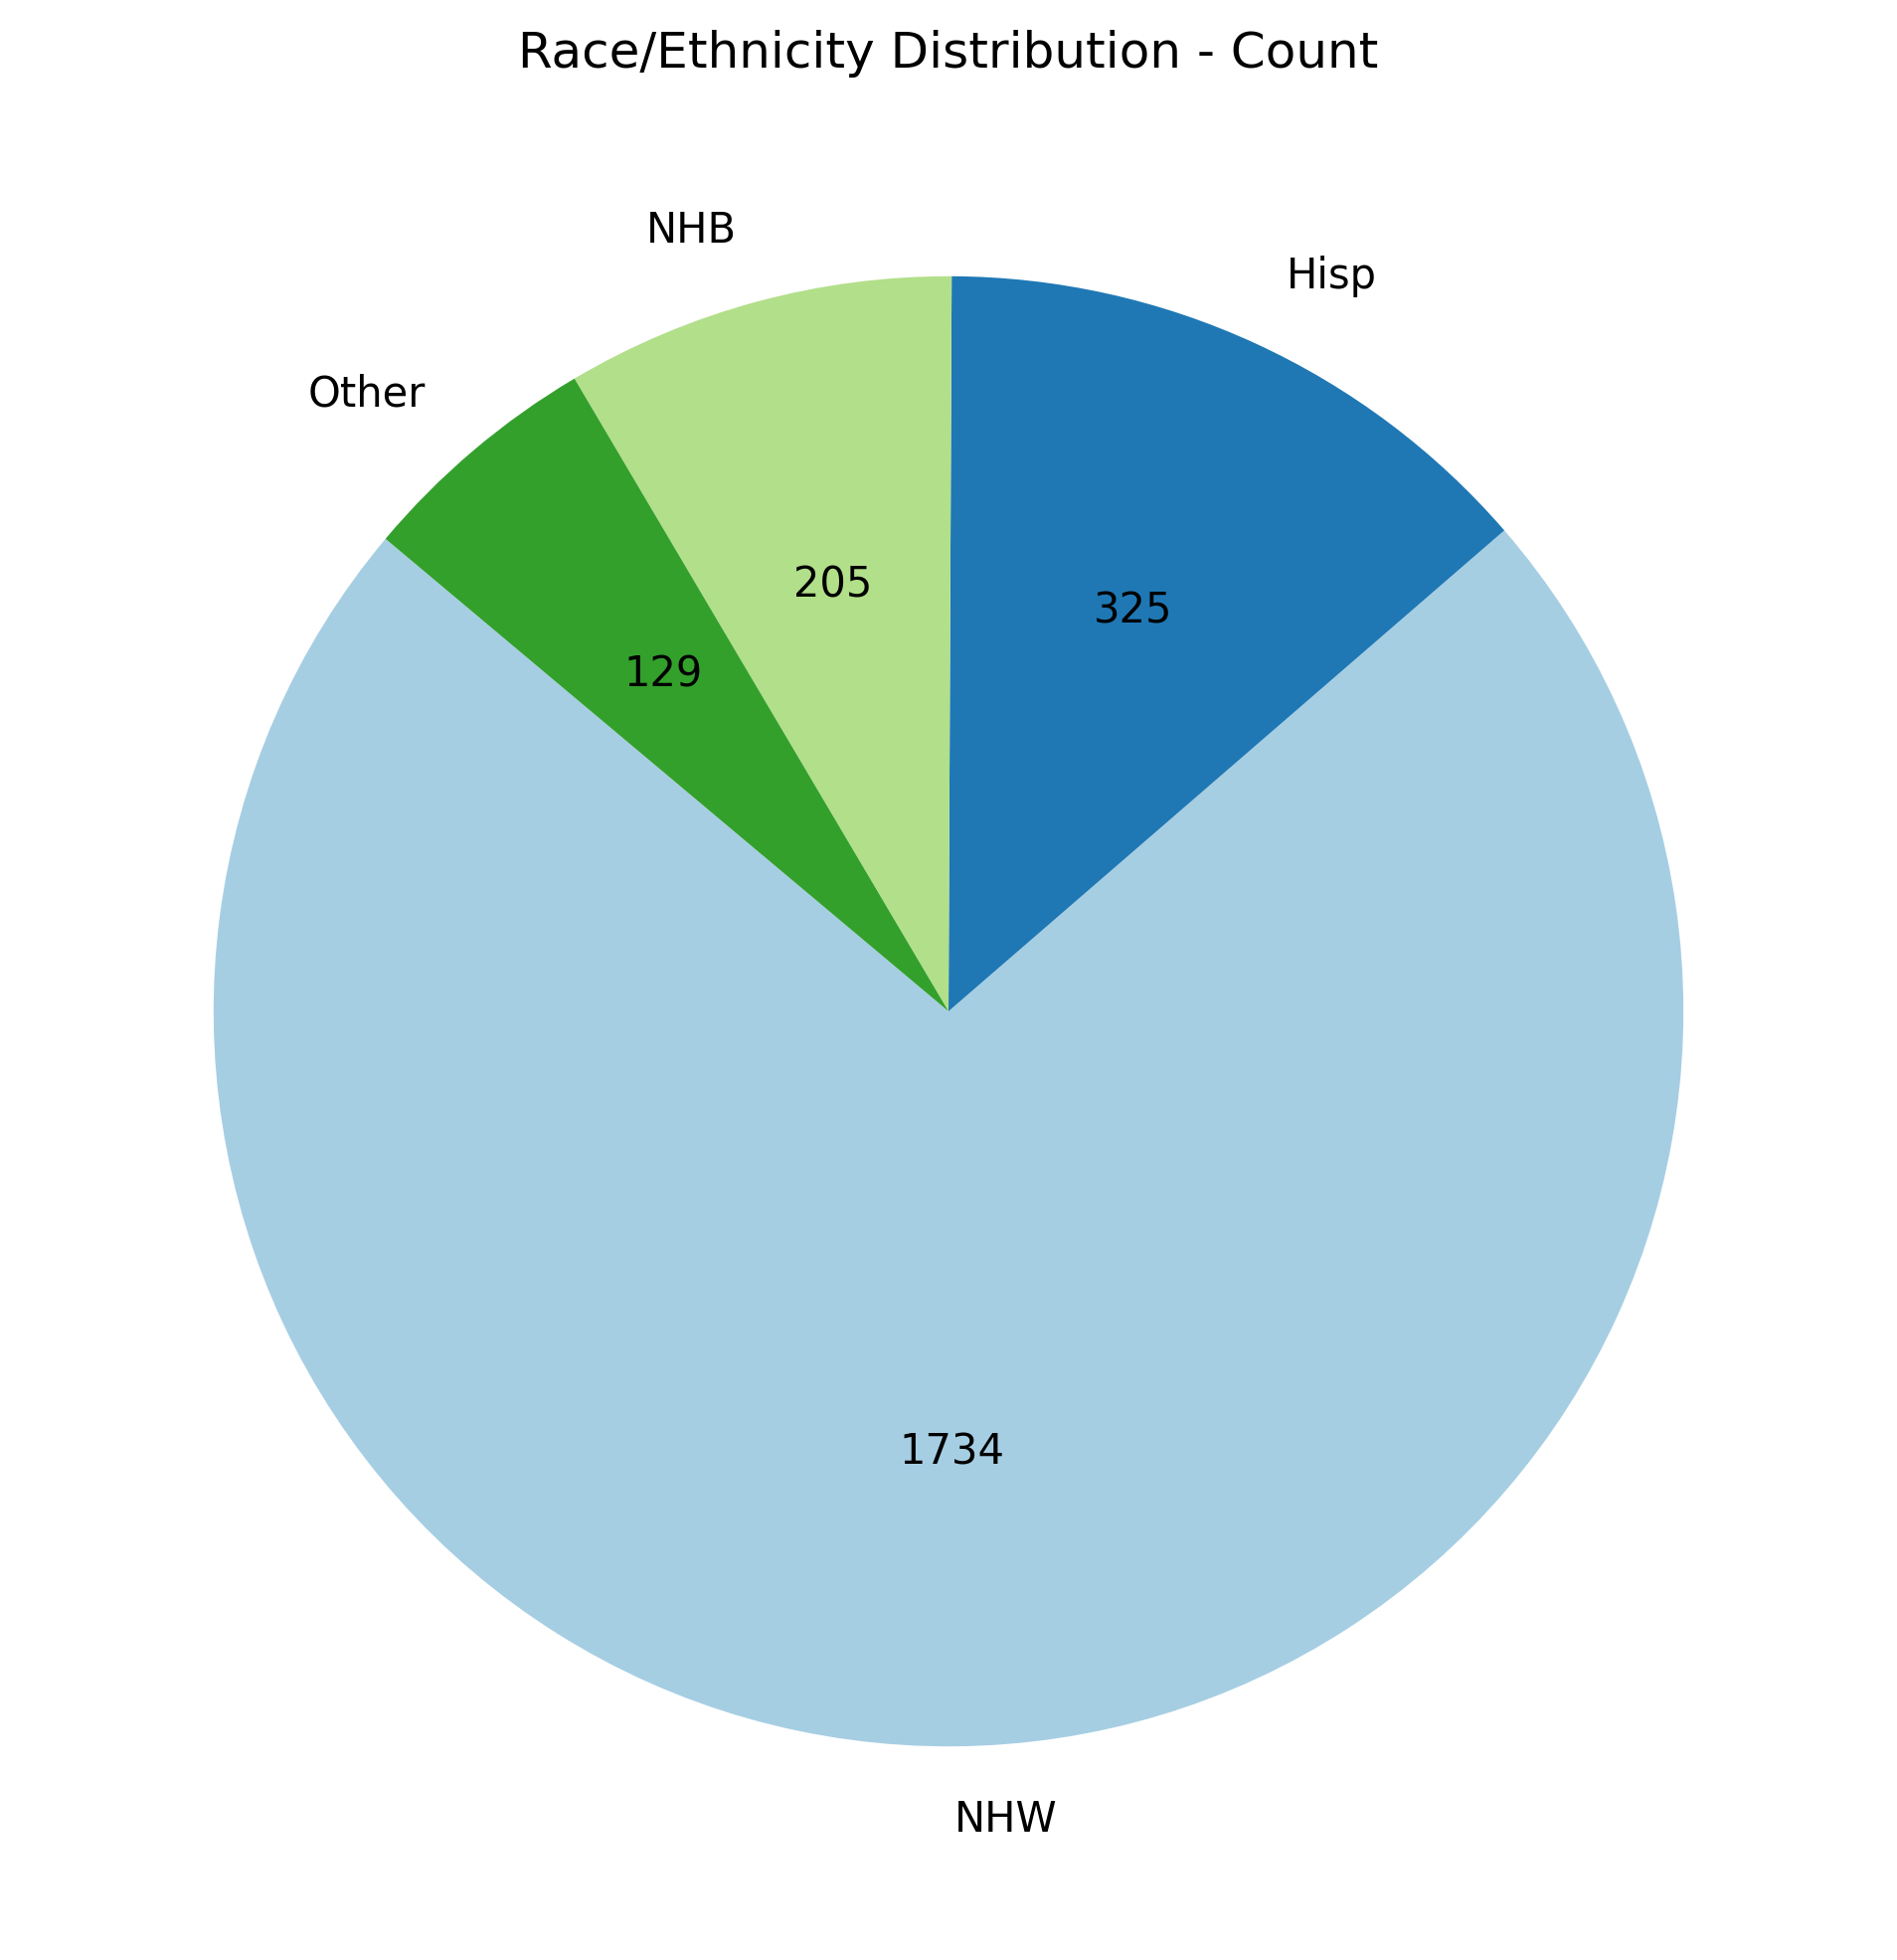

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count each category
race_counts = df['RaceEth'].value_counts()

# Function to format the pie slices as the absolute count instead of percentage
def absolute_value(val):
    a  = round(val/100.*race_counts.sum(), 0)
    return int(a)

# Create a pie chart
plt.figure(figsize=(8, 8), dpi=300)  # Set the figure size for better visibility
plt.pie(race_counts, labels=race_counts.index, autopct=absolute_value, startangle=140, colors=plt.cm.Paired(range(len(race_counts))))
plt.title('Race/Ethnicity Distribution - Count')

# Display the pie chart
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv', index=False)

# Confirm the file has been saved
print("The DataFrame has been updated with the 'RaceEth' column and saved to 'updated_dataset_with_raceeth.csv'.")


The DataFrame has been updated with the 'RaceEth' column and saved to 'updated_dataset_with_raceeth.csv'.


In [ ]:
md = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv')


In [ ]:
md

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [ ]:
# Assuming `md` is your DataFrame

# Select columns that start with 'UDS'
uds_columns = md.filter(like='UDS').columns

# Convert counts to binary presence (1) or absence (0)
md[uds_columns] = md[uds_columns].applymap(lambda x: 1 if x > 0 else 0)

# This will modify the columns in place, converting values greater than 0 to 1


In [ ]:
md

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,1,0,0,0,0,1,0,1,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,1,0,0,1,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,1,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,1,0,1,1,0,1,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,1,0,1,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe


# Apples to Apples
#Split into two functions
#1 that creates a list of k df with dimension N*2 (N is the sum of the little ns) 
#The df are going to have sample IDs and Race_eth(only two columns)
#first df in list will be half NHW and half minority participants (N=1000)
#Last df in list will have the first 500 rows of the first df, (all NHW samples)
#And the last 500 rows will have the 500 minority participants with 500 other NHW N= 1000
#Each dataset in the middle will have decreasing count of minority participants from 450 down to 50
#For every call we will be replacing 50 samples but the first 500 NHW stay the same, AND 
#The other minority participants will stay the same. 
#who, race-eth, sex, outcome
#2 Second function takes in the list of k dfs of subject id and race eth and uses that
#to merge out the rest of the data that we need for modeling. 

In [ ]:
import pandas as pd
df = pd.read_csv("/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv")
pd.set_option('display.max_columns', None)


In [ ]:
df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [ ]:
from preprocess import DataPreprocessor  # Preprocessing utility for data preparation


In [ ]:
# Initialize a preprocessor object for data transformation tasks
preprocessor = DataPreprocessor(df)
    
 
    # Specify columns to drop initially
columns_to_drop_1 = [
        'pain_when', 'is_smoker', 'per_day', 'max', 'amount', 'depression', 'anxiety',
        'schizophrenia', "max", "amount", "cocaine_inject_days", "speedball_inject_days",
        "opioid_inject_days", "speed_inject_days", "UDS_Alcohol_Count", 'UDS_Mdma/Hallucinogen_Count'
    ]
    
    # Try to drop the specified columns

preprocessor.drop_columns_and_return(columns_to_drop_1)
    
preprocessor.convert_yes_no_to_binary()
  
    # Specify columns for TLFB (Timeline Follow-Back) counts to process
specified_tlfb_columns = [
        'TLFB_Alcohol_Count', 'TLFB_Amphetamine_Count', 'TLFB_Cocaine_Count',
        'TLFB_Heroin_Count', 'TLFB_Benzodiazepine_Count', 'TLFB_Opioid_Count',
        'TLFB_THC_Count', 'TLFB_Methadone_Count', 'TLFB_Buprenorphine_Count'
    ]
    
   
preprocessor.process_tlfb_columns(specified_tlfb_columns)
 
preprocessor.calculate_behavioral_columns()
  
# preprocessor.move_column_to_end(selected_outcome)


# Specify columns to drop initially
columns_to_drop_2 = ['msm_npt', 'msm_frq', 'txx_prt']
    
  
preprocessor.drop_columns_and_return(columns_to_drop_2)
   
preprocessor.transform_data_with_nan_handling()
   
preprocessor.rename_columns()
   
    # Transform NaN (missing values) to zeros for binary columns
    
preprocessor.transform_nan_to_zero_for_binary_columns()
   
   
preprocessor.transform_and_rename_column('heroin_inject_days', 'rbsivheroin')
  
    # Fill missing values (NaN) with zeros for the 'ftnd' column

preprocessor.fill_nan_with_zero('ftnd')
    # Specify additional columns to drop
columns_to_drop_2 = [
        'rbs_iv_days', 'race', 'RBS_cocaine_Days', 'RBS_heroin_Days',
        'RBS_opioid_Days', 'RBS_speed_Days', 'RBS_speedball_Days'
    ]
    

preprocessor.drop_columns_and_return(columns_to_drop_2)
   
preprocessor.convert_uds_to_binary()
processed_data = preprocessor.dataframe



Dropping columns: ['pain_when', 'is_smoker', 'per_day', 'max', 'amount', 'depression', 'anxiety', 'schizophrenia', 'max', 'amount', 'cocaine_inject_days', 'speedball_inject_days', 'opioid_inject_days', 'speed_inject_days', 'UDS_Alcohol_Count', 'UDS_Mdma/Hallucinogen_Count']
Snippet of the new DataFrame after dropping columns:
       who   age is_hispanic   race RaceEth        job is_living_stable  \
0        2  30.0          No  White     NHW  Full Time              Yes   
1        3  23.0          No  Black     NHB  Full Time              Yes   
2        6  43.0          No  White     NHW  Full Time              Yes   
3        7  33.0          No  White     NHW  Part Time              Yes   
4        9  25.0         Yes  Black    Hisp  Part Time              Yes   
...    ...   ...         ...    ...     ...        ...              ...   
2388  3556  56.0          No  White     NHW  Full Time              Yes   
2389  3557  31.0          No  White     NHW        NaN              NaN 

In [ ]:
processed_data

,who,age,is_hispanic,RaceEth,unemployed,unstableliving,education,marital,is_female,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,ftnd,XTRT,shared,rbsivheroin,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Cocaine_Count,TLFB_Heroin_Count,TLFB_Methadone_Count,TLFB_Opioid_Count,TLFB_THC_Count,TLFB_Other,Homosexual_Behavior,Non_monogamous_Relationships
0,2,30.0,0,1,0,0,3.0,2.0,1,0,1,0,0,0,1,0,1,1,0.0,0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,8,0,1,0,0,0,0,29,12,0,0.0,0.0
1,3,23.0,0,2,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,0.0,0.0,0,1,1.0,1.0,1.0,1.0,1.0,3.0,2,1,1,0,0,0,0,1,21,0,0,0,0,0.0,1.0
2,6,43.0,0,1,0,0,2.0,3.0,0,0,0,0,1,0,1,0,0,1,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,1,0,0,0,4,0,0,29,0,0,0.0,0.0
3,7,33.0,0,1,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,3,1,1,0,0,0,0,0,0,0,20,0,0,0.0,0.0
4,9,25.0,1,3,0,0,2.0,2.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,3,0,1,3,0,0,1,2,10,0,0,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,0,1,0,0,3.0,4.0,0,0,0,0,0,0,1,0,0,1,0.0,1,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,29,0,0,0.0,0.0
2389,3557,31.0,0,1,1,1,0.0,1.0,0,0,1,0,1,1,1,0,1,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,1.0,1.0,1.0,0.0,4,0,1,0,0,7,0,7,25,4,0,8,0,0.0,0.0
2390,3558,27.0,0,1,0,0,2.0,2.0,0,0,1,0,1,1,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,5,0,0,0,0,1,0,0,0,28,0,0,0,0.0,0.0
2391,3559,34.0,0,4,0,0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,3,0,1,0,0,0,9,0,9,0,0,22,0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def create_demographic_dfs(data, initial_nhw=500, initial_minority=500, step=50):
    """
    Create a list of DataFrames with different demographic distributions.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - initial_nhw: Initial number of Non-Hispanic White participants.
    - initial_minority: Initial number of minority participants.
    - step: The step size for increasing NHW and decreasing minority participants in each subsequent DataFrame.
    
    Returns:
    - df_list: A list of DataFrames with different demographic distributions.
    """
    
    df_list = []  # Initialize an empty list to store the DataFrames
    minority_groups = data[data['RaceEth'] != 1]  # Select rows where 'RaceEth' is not NHW
    nhw_group = data[data['RaceEth'] == 1]  # Select rows where 'RaceEth' is NHW
    
    initial_nhw_sample = nhw_group.sample(n=initial_nhw, random_state=42)  # Sample initial NHW participants
    initial_minority_sample = minority_groups.sample(n=initial_minority, random_state=42)  # Sample initial minority participants
    
    current_nhw_sample = initial_nhw_sample.copy()  # Copy the initial NHW sample to use as the starting point
    remaining_minority_sample = initial_minority_sample.copy()  # Copy the initial minority sample to use as the starting point
    
    current_nhw = initial_nhw  # Initialize current NHW count
    current_minority = initial_minority  # Initialize current minority count

    while current_minority > 0:  # Loop until there are no more minority participants to decrement
        minority_sample = remaining_minority_sample.head(current_minority)  # Select the first current_minority participants from the remaining sample
        
        if current_nhw > initial_nhw:  # If additional NHW participants are needed
            knn = NearestNeighbors(n_neighbors=1)  # Initialize the K-Nearest Neighbors model with 1 neighbor
            knn.fit(nhw_group[['age', 'is_female']])  # Fit the KNN model on the NHW participants' age and gender
            minority_features = remaining_minority_sample.head(step)[['age', 'is_female']]  # Get the age and gender features of the next batch of minority participants to replace
            distances, indices = knn.kneighbors(minority_features)  # Find the nearest NHW participants for the minority participants to replace
            closest_nhw_indices = indices.flatten()  # Get the indices of the closest NHW participants
            additional_nhw_sample = nhw_group.iloc[closest_nhw_indices]  # Select the closest NHW participants
            current_nhw_sample = pd.concat([current_nhw_sample, additional_nhw_sample])  # Concatenate the additional NHW participants to the current NHW sample
            nhw_group = nhw_group.drop(nhw_group.index[closest_nhw_indices])  # Drop the selected NHW participants from the NHW group

        subset = pd.concat([current_nhw_sample, minority_sample])  # Concatenate the NHW and minority samples to form the subset
        df_list.append(subset[['who', 'RaceEth', 'age', 'is_female']])  # Append the subset to the list with selected columns
        
        current_nhw += step  # Increment the NHW count by the step size
        current_minority -= step  # Decrement the minority count by the step size

        if current_minority <= 0:  # If no more minority participants are left
            current_minority = 0  # Ensure current_minority is set to 0 for the final subset
            break  # Exit the loop

        remaining_minority_sample = remaining_minority_sample.head(current_minority)  # Update the remaining minority sample

    # Ensure the final subset has exactly 1000 NHW participants
    while current_nhw_sample.shape[0] < 1000:
        knn = NearestNeighbors(n_neighbors=1)  # Initialize the K-Nearest Neighbors model with 1 neighbor
        knn.fit(nhw_group[['age', 'is_female']])  # Fit the KNN model on the NHW participants' age and gender
        distances, indices = knn.kneighbors(nhw_group[['age', 'is_female']].head(1))  # Find the nearest NHW participants
        closest_nhw_indices = indices.flatten()  # Get the indices of the closest NHW participants
        additional_nhw_sample = nhw_group.iloc[closest_nhw_indices]  # Select the closest NHW participants
        current_nhw_sample = pd.concat([current_nhw_sample, additional_nhw_sample])  # Add these NHW participants to the current sample
        current_nhw_sample = current_nhw_sample.drop_duplicates()  # Drop duplicate NHW participants
        nhw_group = nhw_group.drop(nhw_group.index[closest_nhw_indices])  # Drop the selected NHW participants

    final_subset = current_nhw_sample.head(1000)  # Ensure the final subset has exactly 1000 NHW participants
    df_list.append(final_subset[['who', 'RaceEth', 'age', 'is_female']])  # Append the final subset to the list

    return df_list  # Return the list of DataFrames



df_list = create_demographic_dfs(processed_data)  # Create the demographic dataframes

# Displaying the size of each subset for verification
for i, df in enumerate(df_list):  # Loop through each dataframe in the list
    print(f"Subset {i+1}: size {len(df)} (NHW: {len(df[df['RaceEth'] == 1])}, Minority: {len(df[df['RaceEth'] != 1])})")  # Print the size and composition of each subset


Subset 1: size 1000 (NHW: 500, Minority: 500)
Subset 2: size 1000 (NHW: 550, Minority: 450)
Subset 3: size 1000 (NHW: 600, Minority: 400)
Subset 4: size 1000 (NHW: 650, Minority: 350)
Subset 5: size 1000 (NHW: 700, Minority: 300)
Subset 6: size 1000 (NHW: 750, Minority: 250)
Subset 7: size 1000 (NHW: 800, Minority: 200)
Subset 8: size 1000 (NHW: 850, Minority: 150)
Subset 9: size 1000 (NHW: 900, Minority: 100)
Subset 10: size 1000 (NHW: 950, Minority: 50)
Subset 11: size 1000 (NHW: 1000, Minority: 0)


In [ ]:
import pandas as pd
import numpy as np

def create_demographic_dfs(data, initial_nhw=500, initial_minority=500, step=50):
    """
    Create a list of DataFrames with different demographic distributions.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - initial_nhw: Initial number of Non-Hispanic White participants.
    - initial_minority: Initial number of minority participants.
    - step: The step size for increasing NHW and decreasing minority participants in each subsequent DataFrame.
    
    Returns:
    - df_list: A list of DataFrames with different demographic distributions.
    """
    
    df_list = []  # Initialize an empty list to store the DataFrames
    minority_groups = data[data['RaceEth'] != 1]  # Select rows where 'RaceEth' is not NHW
    nhw_group = data[data['RaceEth'] == 1]  # Select rows where 'RaceEth' is NHW
    
    initial_nhw_sample = nhw_group.sample(n=initial_nhw)  # Sample initial NHW participants
    initial_minority_sample = minority_groups.sample(n=initial_minority)  # Sample initial minority participants
    
    current_nhw_sample = initial_nhw_sample.copy()  # Copy the initial NHW sample to use as the starting point
    remaining_minority_sample = initial_minority_sample.copy()  # Copy the initial minority sample to use as the starting point
    
    current_nhw = initial_nhw  # Initialize current NHW count
    current_minority = initial_minority  # Initialize current minority count

    # Track index of NHW samples to ensure we keep adding the next available ones
    nhw_index = initial_nhw_sample.index.tolist()  # Start with the indices of the initial NHW sample

    while current_minority > 0:  # Loop until there are no more minority participants to decrement
        minority_sample = remaining_minority_sample.head(current_minority)  # Select the first current_minority participants from the remaining sample

        if current_nhw < 1000:  # Add additional NHW participants until we reach 1000
            additional_nhw_needed = min(step, 1000 - current_nhw)
            # Select the next available NHW participants, skip duplicates
            additional_nhw_sample = nhw_group.drop(nhw_index).sample(n=additional_nhw_needed, random_state=42)
            current_nhw_sample = pd.concat([current_nhw_sample, additional_nhw_sample])
            nhw_index.extend(additional_nhw_sample.index.tolist())  # Track the newly selected NHW indices
            
        subset = pd.concat([current_nhw_sample.head(current_nhw), minority_sample])  # Use only the correct number of NHW participants
        df_list.append(subset[['who', 'RaceEth', 'age', 'is_female']])  # Append the subset to the list with selected columns
        
        current_nhw += step  # Increment the NHW count by the step size
        current_minority -= step  # Decrement the minority count by the step size

        if current_minority <= 0:  # If no more minority participants are left
            current_minority = 0  # Ensure current_minority is set to 0 for the final subset
            break  # Exit the loop

        remaining_minority_sample = remaining_minority_sample.head(current_minority)  # Update the remaining minority sample

    # Handle the final subset if it's not reaching 1000 participants
    while current_nhw_sample.shape[0] < 1000:
        additional_nhw_needed = 1000 - current_nhw_sample.shape[0]
        # Select the next available NHW participants, skip duplicates
        additional_nhw_sample = nhw_group.drop(nhw_index).sample(n=additional_nhw_needed, random_state=42)
        current_nhw_sample = pd.concat([current_nhw_sample, additional_nhw_sample]).drop_duplicates()
        nhw_index.extend(additional_nhw_sample.index.tolist())  # Track the newly selected NHW indices

    final_subset = current_nhw_sample.head(1000)  # Ensure the final subset has exactly 1000 NHW participants
    df_list.append(final_subset[['who', 'RaceEth', 'age', 'is_female']])  # Append the final subset to the list

    return df_list  # Return the list of DataFrames

# Example usage
df_list = create_demographic_dfs(processed_data)

# Displaying the size of each subset for verification
for i, df in enumerate(df_list):  # Loop through each dataframe in the list
    print(f"Subset {i+1}: size {len(df)} (NHW: {len(df[df['RaceEth'] == 1])}, Minority: {len(df[df['RaceEth'] != 1])})")


Subset 1: size 1000 (NHW: 500, Minority: 500)
Subset 2: size 1000 (NHW: 550, Minority: 450)
Subset 3: size 1000 (NHW: 600, Minority: 400)
Subset 4: size 1000 (NHW: 650, Minority: 350)
Subset 5: size 1000 (NHW: 700, Minority: 300)
Subset 6: size 1000 (NHW: 750, Minority: 250)
Subset 7: size 1000 (NHW: 800, Minority: 200)
Subset 8: size 1000 (NHW: 850, Minority: 150)
Subset 9: size 1000 (NHW: 900, Minority: 100)
Subset 10: size 1000 (NHW: 950, Minority: 50)
Subset 11: size 1000 (NHW: 1000, Minority: 0)


In [ ]:
# Example usage
df_list = create_demographic_dfs(processed_data)  # Create the demographic dataframes

# Displaying the size of each subset for verification
for i, df in enumerate(df_list):  # Loop through each dataframe in the list
    print(f"Subset {i+1}: size {len(df)} (NHW: {len(df[df['RaceEth'] == 1])}, Minority: {len(df[df['RaceEth'] != 1])})")  # Print the size and composition of each subset


IndexError: positional indexers are out-of-bounds

In [ ]:
def merge_demographic_data(demographic_dfs, full_data):
    """
    Merge the list of demographic DataFrames with the full dataset.
    
    Parameters:
    - demographic_dfs: List of DataFrames with 'who', 'RaceEth', 'age', and 'is_female' columns.
    - full_data: The full dataset containing all other columns.
    
    Returns:
    - A list of merged DataFrames.
    """
    merged_dfs = []  # Initialize an empty list to store the merged DataFrames

    # Drop duplicate columns from full_data
    columns_to_drop = ['RaceEth', 'age', 'is_female']

    # Loop through each demographic DataFrame in the list
    for demo_df in demographic_dfs:
        # Merge the demographic DataFrame with the full dataset on the 'who' column
        merged_df = pd.merge(demo_df, full_data.drop(columns=columns_to_drop, errors='ignore'), on='who', how='left')
        # Append the merged DataFrame to the list
        merged_dfs.append(merged_df)
    
    return merged_dfs  # Return the list of merged DataFrames


In [ ]:
# Create demographic subsets
demographic_dfs = create_demographic_dfs(processed_data, initial_nhw=500, initial_minority=500, step=50)


In [ ]:
demographic_dfs

[       who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 196    281        3  44.0          1
 1530  2227        2  42.0          0
 1735  2560        3  21.0          1
 1804  2682        3  27.0          0
 392    566        3  29.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 1119  1635        4  34.0          1
 1703  2509        3  51.0          0
 440    645        3  22.0          0
 1994  2964        4  32.0          0
 340    491        3  51.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_f

In [ ]:
processed_data

,who,age,is_hispanic,RaceEth,unemployed,unstableliving,education,marital,is_female,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,ftnd,XTRT,shared,rbsivheroin,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Cocaine_Count,TLFB_Heroin_Count,TLFB_Methadone_Count,TLFB_Opioid_Count,TLFB_THC_Count,TLFB_Other,Homosexual_Behavior,Non_monogamous_Relationships
0,2,30.0,0,1,0,0,3.0,2.0,1,0,1,0,0,0,1,0,1,1,0.0,0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,8,0,1,0,0,0,0,29,12,0,0.0,0.0
1,3,23.0,0,2,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,0.0,0.0,0,1,1.0,1.0,1.0,1.0,1.0,3.0,2,1,1,0,0,0,0,1,21,0,0,0,0,0.0,1.0
2,6,43.0,0,1,0,0,2.0,3.0,0,0,0,0,1,0,1,0,0,1,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,1,0,0,0,4,0,0,29,0,0,0.0,0.0
3,7,33.0,0,1,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,3,1,1,0,0,0,0,0,0,0,20,0,0,0.0,0.0
4,9,25.0,1,3,0,0,2.0,2.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,3,0,1,3,0,0,1,2,10,0,0,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,0,1,0,0,3.0,4.0,0,0,0,0,0,0,1,0,0,1,0.0,1,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,29,0,0,0.0,0.0
2389,3557,31.0,0,1,1,1,0.0,1.0,0,0,1,0,1,1,1,0,1,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,1.0,1.0,1.0,0.0,4,0,1,0,0,7,0,7,25,4,0,8,0,0.0,0.0
2390,3558,27.0,0,1,0,0,2.0,2.0,0,0,1,0,1,1,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,5,0,0,0,0,1,0,0,0,28,0,0,0,0.0,0.0
2391,3559,34.0,0,4,0,0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,3,0,1,0,0,0,9,0,9,0,0,22,0,0.0,0.0


In [ ]:
demographic_dfs

[       who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 196    281        3  44.0          1
 1530  2227        2  42.0          0
 1735  2560        3  21.0          1
 1804  2682        3  27.0          0
 392    566        3  29.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 1119  1635        4  34.0          1
 1703  2509        3  51.0          0
 440    645        3  22.0          0
 1994  2964        4  32.0          0
 340    491        3  51.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_f

In [ ]:
merge_demographic_data(demographic_dfs, processed_data)

[      who  RaceEth   age  is_female  is_hispanic  unemployed  unstableliving  \
 0    1088        1  28.0          0            0           1               1   
 1     264        1  21.0          0            0           1               1   
 2    1505        1  33.0          0            0           0               0   
 3    2898        1  41.0          0            0           1               1   
 4    3047        1  34.0          0            0           1               1   
 ..    ...      ...   ...        ...          ...         ...             ...   
 995   281        3  44.0          1            1           1               1   
 996  2227        2  42.0          0            0           1               1   
 997  2560        3  21.0          1            1           0               0   
 998  2682        3  27.0          0            1           1               1   
 999   566        3  29.0          0            1           0               0   
 
      education  marital  

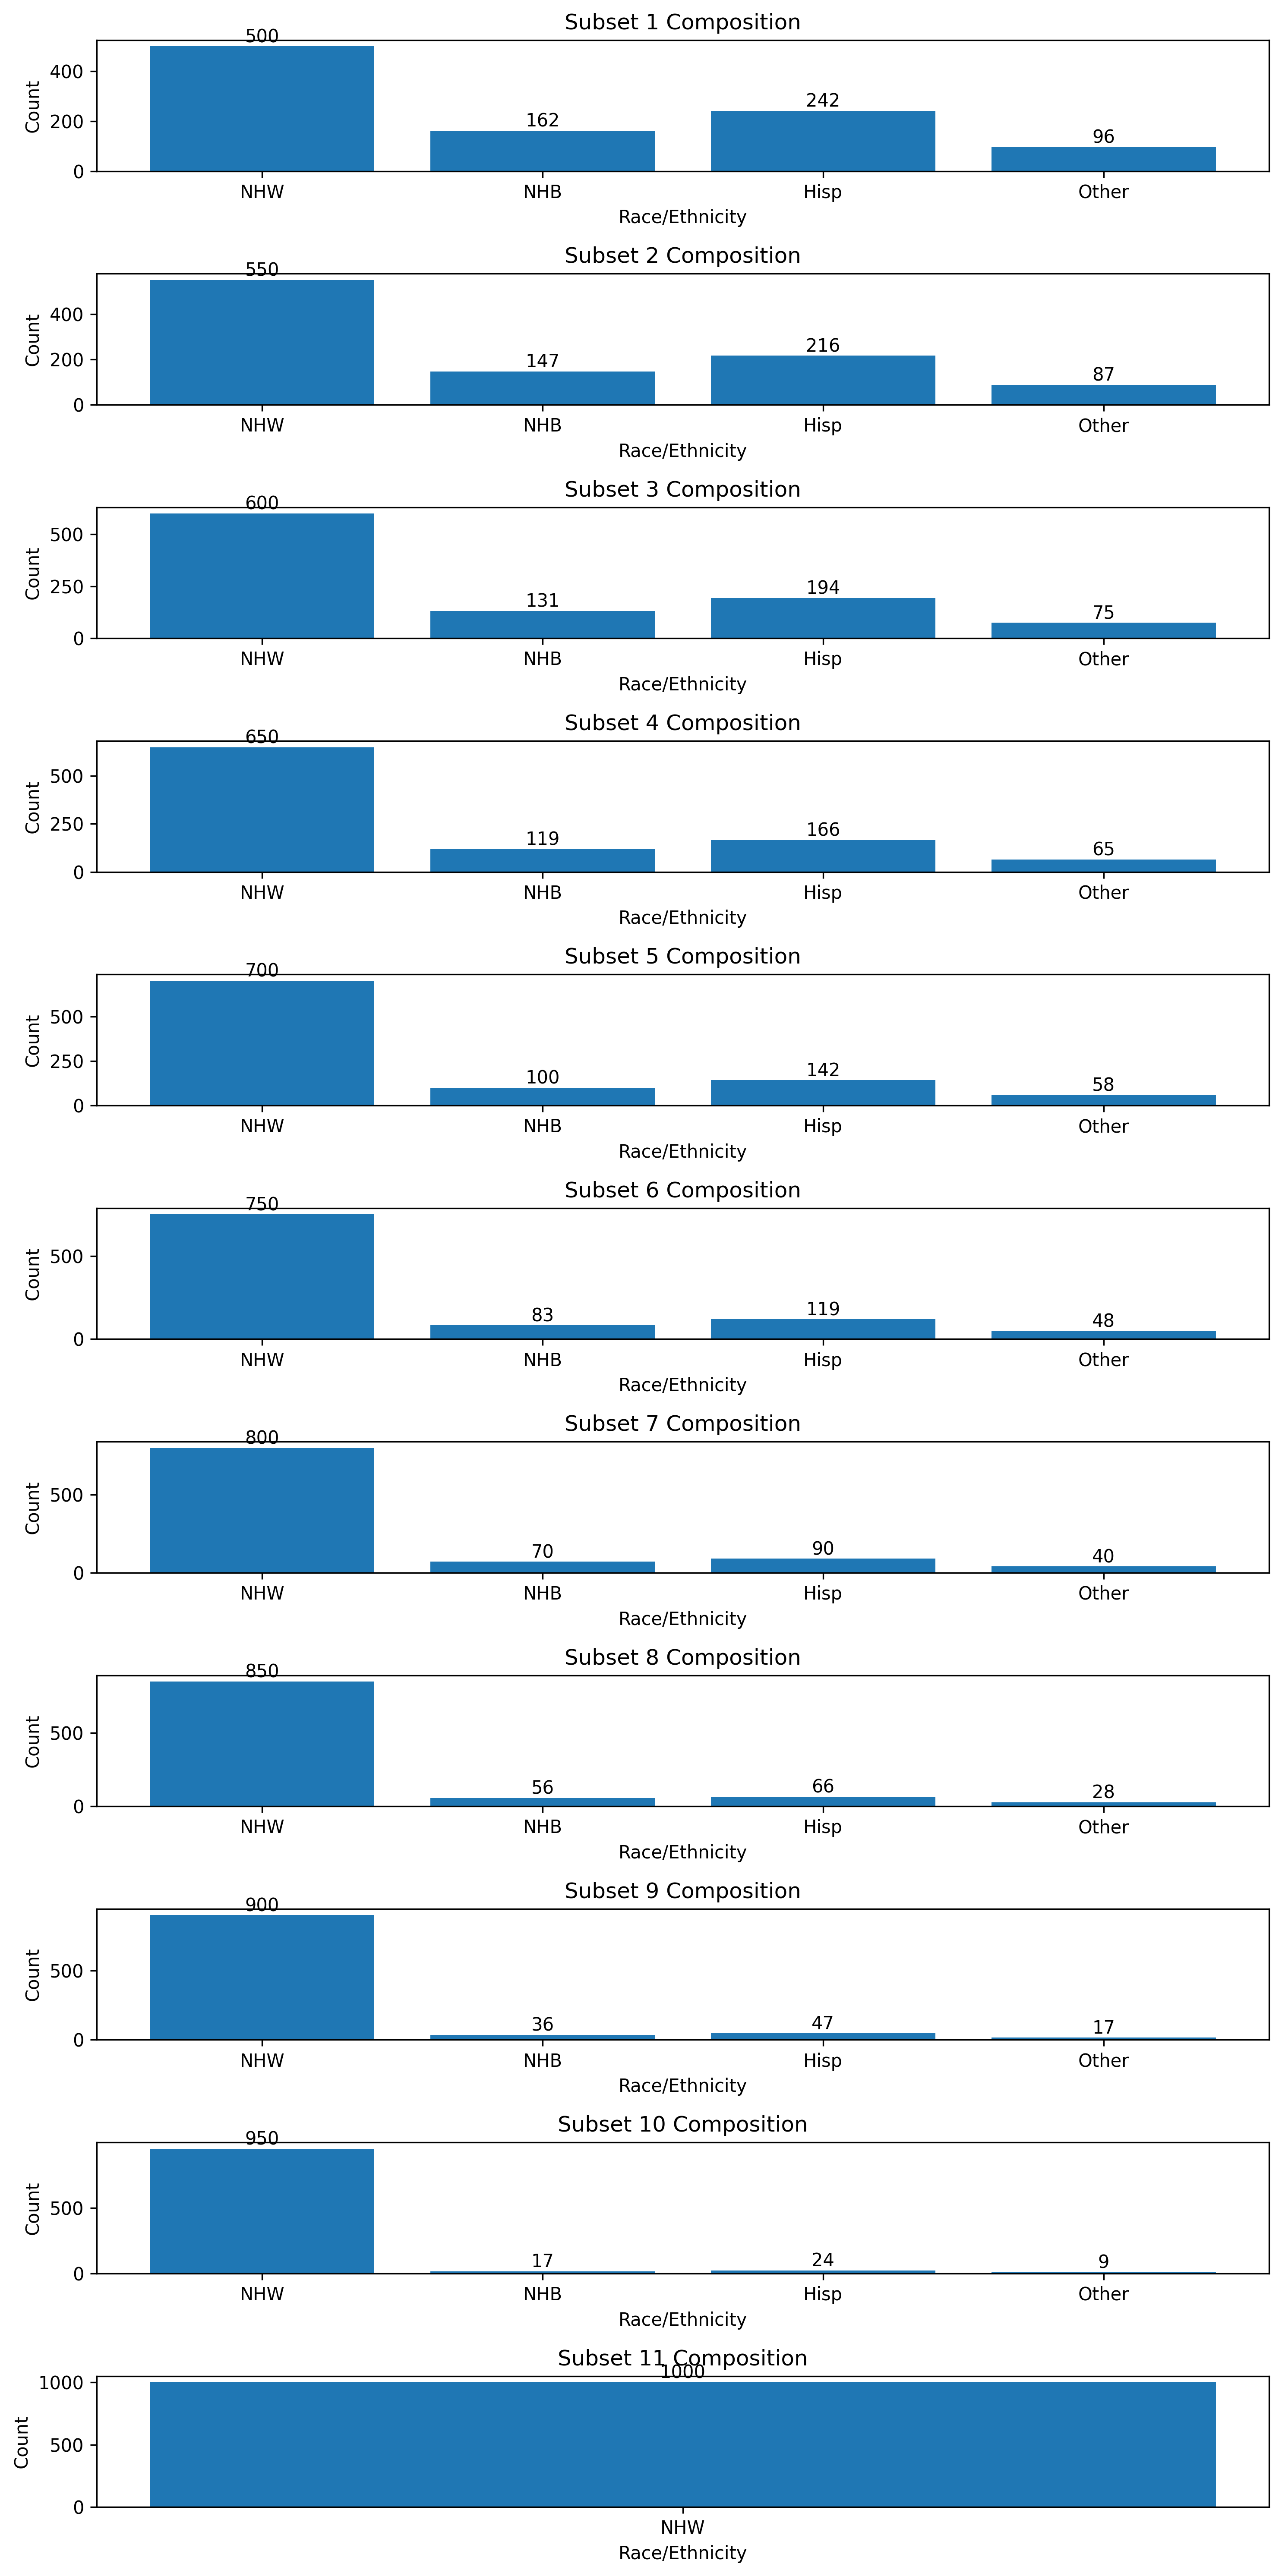

In [ ]:
import matplotlib.pyplot as plt

race_eth_mapping = {
    1: 'NHW',  # Non-Hispanic White
    2: 'NHB',  # Non-Hispanic Black
    3: 'Hisp',  # Hispanic
    4: 'Other',  # Other races or mixed
    0: 'Refused/missing'  # Handling missing values explicitly
}

# Example list of DataFrames (you should replace this with your actual list of subsets)
demographic_dfs = df_list  # Assuming df_list contains the demographic dataframes

# Create a grid of subplots.
fig, axs = plt.subplots(len(demographic_dfs), 1, figsize=(10, 20), dpi=300)

# Loop through each subset to plot the counts of RaceEth
for i, subset in enumerate(demographic_dfs):
    counts = subset['RaceEth'].value_counts().sort_index()  # Get the count of each race/ethnicity in the subset.
    counts.index = counts.index.map(race_eth_mapping)  # Map the numeric codes to descriptive labels
    axs[i].bar(counts.index.astype(str), counts.values)  # Plot a bar graph for the counts.
    axs[i].set_title(f'Subset {i+1} Composition')  # Set the title for each subplot.
    axs[i].set_xlabel('Race/Ethnicity')  # Label the x-axis as 'Race/Ethnicity'.
    axs[i].set_ylabel('Count')  # Label the y-axis as 'Count'.
    
    # Annotate each bar with the count.
    for index, value in enumerate(counts.values):
        axs[i].text(index, value + 0.5, str(value), ha='center', va='bottom')  # Place a text above each bar showing the count.

plt.tight_layout()  # Adjust the layout to make sure there's no overlap.
plt.show()  # Display the plot.


In [ ]:
import pandas as pd
# Replace 'file_path.csv' with the actual path to your CSV file
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomesCTN0094.csv')
pd.set_option('display.max_columns', None)


In [ ]:
df

,who,usePatternUDS,Ab_ctnNinetyFour_2023,Ab_fiellin_2006,Ab_kosten_1993,Ab_krupitskyA_2011,Ab_krupitskyB_2011,Ab_ling_1998,Ab_lofwall_2018,AbT_mokri_2016,AbE_mokri_2016,Ab_schottenfeld_2005,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008,Ab_schottenfeldB_2008,AbT_shufman_1994,AbE_shufman_1994,Ab_ctnThirty_2011,Rd_comer_2006,Rd_eissenberg_1997,Rd_fiellin_2006,Rd_fudala_2003,Rd_haight_2019,Rd_jaffe_1972,Rd_johnson_1992,Rd_kostenB_1993,Rd_lingA_1998,Rd_lingC_1998,Rd_ling_2010,Rd_lingA_1976,Rd_lingB_1976,Rd_lofwall_2018,Rd_mattickA_2003,Rd_mattickB_2003,Rd_paniA_2000,Rd_paniB_2000,Rd_petitjean_2001,Rd_preston_2000,Rd_schottenfeld_2005,Ab_schwartz_2006,Rd_shufman_1994,Rd_soyka_2008,Rd_strain_1993,Rd_strain_1994,Rd_strain_1996,Rd_strain_1999,Rd_strang_2010,Rd_strang_2019,Rd_tanum_2017,Rd_wolstein_2009,Rd_woody_2008,Rd_zaks_1972,RsT_ctnNinetyFour_2023,RsE_ctnNinetyFour_2023,DrT_ctnNinetyFour_2023,DrE_ctnNinetyFour_2023,Rs_johnson_1992,Rs_krupitsky_2004,RsT_lee_2016,RsE_lee_2016,RsT_ctnFiftyOne_2018,RsE_ctnFiftyOne_2018,RsT_schottenfeld_2008,RsE_schottenfeld_2008
0,1,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
1,2,*---oo-o-o-o+oo,False,6,True,False,3,False,False,1,1,6,1,1,3,1,1,False,0.5625,False,0.433333,0.8125,0.272727,0.900000,0.433333,True,0.812500,6.5,0.433333,101.226667,83.725335,0.633333,0.500000,0.500000,0.8125,0.433333,0.433333,0.500000,0.8125,False,0.900000,0.8125,0.9,0.900000,0.8125,0.900000,False,0.541667,0.500000,0.8125,0.333333,6.5,12,1,12,0,True,True,5,1,12,1,12,1
2,3,o-ooo-ooooooooooooooooo,False,2,False,False,1,False,False,1,1,2,1,1,1,23,0,False,0.2500,False,0.086957,1.0000,0.090909,0.000000,0.086957,True,1.000000,2.0,0.133333,112.373333,76.906077,0.133333,0.333333,0.153846,1.0000,0.086957,0.086957,0.153846,1.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.166667,0.333333,1.0000,0.000000,2.0,7,1,7,1,True,True,3,1,7,1,3,1
3,4,-------------------o-o-o,True,21,True,True,11,True,True,20,1,21,20,1,19,24,0,False,1.0000,True,0.875000,1.0000,1.000000,1.000000,0.875000,True,1.000000,15.0,1.000000,120.000000,120.000000,1.000000,0.913043,1.000000,1.0000,0.875000,0.875000,1.000000,1.0000,True,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,True,1.000000,0.913043,1.0000,1.000000,21.0,21,0,21,0,False,False,21,1,21,0,22,0
4,5,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,+---o+o-----o----o+ooooooooooo,True,12,True,False,7,True,False,1,1,9,1,1,5,1,1,False,0.5000,True,0.400000,0.8000,0.636364,0.900000,0.400000,True,0.800000,10.0,0.666667,110.240000,100.962904,0.533333,0.631579,0.615385,0.8000,0.400000,0.400000,0.615385,0.8000,True,0.900000,0.8000,0.9,0.900000,0.8000,0.900000,False,0.666667,0.631579,0.8000,1.000000,12.0,18,1,20,1,True,True,5,1,18,1,5,1
3556,3557,-+oo+--oooooooooooooooo,False,3,False,False,2,False,False,2,1,2,2,1,2,2,1,False,0.3750,False,0.130435,0.6000,0.181818,0.000000,0.130435,False,0.600000,3.0,0.200000,106.133333,77.758485,0.266667,0.428571,0.230769,0.6000,0.130435,0.130435,0.230769,0.6000,False,0.913043,0.6000,1.0,0.913043,0.6000,0.913043,False,0.250000,0.428571,0.6000,0.000000,3.0,2,1,8,1,True,True,3,1,8

In [ ]:
# List of columns to select
selected_columns = ['who','Ab_krupitskyA_2011', 'Ab_ling_1998', 'Rs_johnson_1992', 'Rs_krupitsky_2004', 'Rd_kostenB_1993']

# Select these columns and display them
df_selected = df[selected_columns]
df_selected


,who,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,1,False,False,True,True,False
1,2,False,False,True,True,True
2,3,False,False,True,True,True
3,4,True,True,False,False,True
4,5,False,False,True,True,False
...,...,...,...,...,...,...
3555,3556,False,True,True,True,True
3556,3557,False,False,True,True,False
3557,3558,False,True,True,True,True
3558,3559,False,True,True,True,True


In [ ]:
df_selected.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,who,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,1,0,0,1,1,0
1,2,0,0,1,1,1
2,3,0,0,1,1,1
3,4,1,1,0,0,1
4,5,0,0,1,1,0
...,...,...,...,...,...,...
3555,3556,0,1,1,1,1
3556,3557,0,0,1,1,0
3557,3558,0,1,1,1,1
3558,3559,0,1,1,1,1


In [ ]:
# Save the DataFrame as a CSV file
df_selected.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/binary_outcome_selections.csv', index=False)


In [ ]:
master_df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv')
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

In [ ]:
# Merging on the 'who' column
merged_df = pd.merge(master_df, df_selected, on='who', how='inner')


In [ ]:
merged_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1,False,False,True,True,True
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1,False,False,True,True,True
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1,False,False,True,True,False
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1,False,True,True,True,True
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1,False,True,True,True,True
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1,F

In [ ]:
merged_df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomes_merged_dataset.csv', index=False)


In [ ]:
selected_columns = ['who','ctn0094_relapse_event', 'Ab_krupitskyA_2011',	'Ab_ling_1998',	'Rs_johnson_1992',	'Rs_krupitsky_2004',	'Rd_kostenB_1993']

In [ ]:
selected_df = merged_df[selected_columns]
selected_df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,False,False,True,True,True
1,3,1,False,False,True,True,True
2,6,1,False,False,True,True,False
3,7,1,False,True,True,True,True
4,9,1,False,False,True,True,False
...,...,...,...,...,...,...,...
2388,3556,1,False,True,True,True,True
2389,3557,1,False,False,True,True,False
2390,3558,1,False,True,True,True,True
2391,3559,1,False,True,True,True,True


In [ ]:
df = selected_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,0,0,1,1,1
1,3,1,0,0,1,1,1
2,6,1,0,0,1,1,0
3,7,1,0,1,1,1,1
4,9,1,0,0,1,1,0
...,...,...,...,...,...,...,...
2388,3556,1,0,1,1,1,1
2389,3557,1,0,0,1,1,0
2390,3558,1,0,1,1,1,1
2391,3559,1,0,1,1,1,1


In [ ]:
df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,0,0,1,1,1
1,3,1,0,0,1,1,1
2,6,1,0,0,1,1,0
3,7,1,0,1,1,1,1
4,9,1,0,0,1,1,0
...,...,...,...,...,...,...,...
2388,3556,1,0,1,1,1,1
2389,3557,1,0,0,1,1,0
2390,3558,1,0,1,1,1,1
2391,3559,1,0,1,1,1,1


In [ ]:
df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/all_binary_selected_outcomes.csv', index=False)


In [ ]:
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

In [ ]:
# Assuming `master_df` is your DataFrame
master_df = master_df.drop(columns=['ctn0094_relapse_event'])


In [ ]:
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [ ]:
master_df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv', index=False)


In [ ]:
import pandas as pd
# Replace 'file_path.csv' with the actual path to your CSV file
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomesCTN0094.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df

,who,usePatternUDS,Ab_ctnNinetyFour_2023,Ab_fiellin_2006,Ab_kosten_1993,Ab_krupitskyA_2011,Ab_krupitskyB_2011,Ab_ling_1998,Ab_lofwall_2018,AbT_mokri_2016,AbE_mokri_2016,Ab_schottenfeld_2005,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008,Ab_schottenfeldB_2008,AbT_shufman_1994,AbE_shufman_1994,Ab_ctnThirty_2011,Rd_comer_2006,Rd_eissenberg_1997,Rd_fiellin_2006,Rd_fudala_2003,Rd_haight_2019,Rd_jaffe_1972,Rd_johnson_1992,Rd_kostenB_1993,Rd_lingA_1998,Rd_lingC_1998,Rd_ling_2010,Rd_lingA_1976,Rd_lingB_1976,Rd_lofwall_2018,Rd_mattickA_2003,Rd_mattickB_2003,Rd_paniA_2000,Rd_paniB_2000,Rd_petitjean_2001,Rd_preston_2000,Rd_schottenfeld_2005,Ab_schwartz_2006,Rd_shufman_1994,Rd_soyka_2008,Rd_strain_1993,Rd_strain_1994,Rd_strain_1996,Rd_strain_1999,Rd_strang_2010,Rd_strang_2019,Rd_tanum_2017,Rd_wolstein_2009,Rd_woody_2008,Rd_zaks_1972,RsT_ctnNinetyFour_2023,RsE_ctnNinetyFour_2023,DrT_ctnNinetyFour_2023,DrE_ctnNinetyFour_2023,Rs_johnson_1992,Rs_krupitsky_2004,RsT_lee_2016,RsE_lee_2016,RsT_ctnFiftyOne_2018,RsE_ctnFiftyOne_2018,RsT_schottenfeld_2008,RsE_schottenfeld_2008
0,1,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
1,2,*---oo-o-o-o+oo,False,6,True,False,3,False,False,1,1,6,1,1,3,1,1,False,0.5625,False,0.433333,0.8125,0.272727,0.900000,0.433333,True,0.812500,6.5,0.433333,101.226667,83.725335,0.633333,0.500000,0.500000,0.8125,0.433333,0.433333,0.500000,0.8125,False,0.900000,0.8125,0.9,0.900000,0.8125,0.900000,False,0.541667,0.500000,0.8125,0.333333,6.5,12,1,12,0,True,True,5,1,12,1,12,1
2,3,o-ooo-ooooooooooooooooo,False,2,False,False,1,False,False,1,1,2,1,1,1,23,0,False,0.2500,False,0.086957,1.0000,0.090909,0.000000,0.086957,True,1.000000,2.0,0.133333,112.373333,76.906077,0.133333,0.333333,0.153846,1.0000,0.086957,0.086957,0.153846,1.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.166667,0.333333,1.0000,0.000000,2.0,7,1,7,1,True,True,3,1,7,1,3,1
3,4,-------------------o-o-o,True,21,True,True,11,True,True,20,1,21,20,1,19,24,0,False,1.0000,True,0.875000,1.0000,1.000000,1.000000,0.875000,True,1.000000,15.0,1.000000,120.000000,120.000000,1.000000,0.913043,1.000000,1.0000,0.875000,0.875000,1.000000,1.0000,True,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,True,1.000000,0.913043,1.0000,1.000000,21.0,21,0,21,0,False,False,21,1,21,0,22,0
4,5,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,+---o+o-----o----o+ooooooooooo,True,12,True,False,7,True,False,1,1,9,1,1,5,1,1,False,0.5000,True,0.400000,0.8000,0.636364,0.900000,0.400000,True,0.800000,10.0,0.666667,110.240000,100.962904,0.533333,0.631579,0.615385,0.8000,0.400000,0.400000,0.615385,0.8000,True,0.900000,0.8000,0.9,0.900000,0.8000,0.900000,False,0.666667,0.631579,0.8000,1.000000,12.0,18,1,20,1,True,True,5,1,18,1,5,1
3556,3557,-+oo+--oooooooooooooooo,False,3,False,False,2,False,False,2,1,2,2,1,2,2,1,False,0.3750,False,0.130435,0.6000,0.181818,0.000000,0.130435,False,0.600000,3.0,0.200000,106.133333,77.758485,0.266667,0.428571,0.230769,0.6000,0.130435,0.130435,0.230769,0.6000,False,0.913043,0.6000,1.0,0.913043,0.6000,0.913043,False,0.250000,0.428571,0.6000,0.000000,3.0,2,1,8,1,True,True,3,1,8

In [ ]:
print(df.columns.tolist())


['who', 'usePatternUDS', 'Ab_ctnNinetyFour_2023', 'Ab_fiellin_2006', 'Ab_kosten_1993', 'Ab_krupitskyA_2011', 'Ab_krupitskyB_2011', 'Ab_ling_1998', 'Ab_lofwall_2018', 'AbT_mokri_2016', 'AbE_mokri_2016', 'Ab_schottenfeld_2005', 'AbT_schottenfeldA_2008', 'AbE_schottenfeldA_2008', 'Ab_schottenfeldB_2008', 'AbT_shufman_1994', 'AbE_shufman_1994', 'Ab_ctnThirty_2011', 'Rd_comer_2006', 'Rd_eissenberg_1997', 'Rd_fiellin_2006', 'Rd_fudala_2003', 'Rd_haight_2019', 'Rd_jaffe_1972', 'Rd_johnson_1992', 'Rd_kostenB_1993', 'Rd_lingA_1998', 'Rd_lingC_1998', 'Rd_ling_2010', 'Rd_lingA_1976', 'Rd_lingB_1976', 'Rd_lofwall_2018', 'Rd_mattickA_2003', 'Rd_mattickB_2003', 'Rd_paniA_2000', 'Rd_paniB_2000', 'Rd_petitjean_2001', 'Rd_preston_2000', 'Rd_schottenfeld_2005', 'Ab_schwartz_2006', 'Rd_shufman_1994', 'Rd_soyka_2008', 'Rd_strain_1993', 'Rd_strain_1994', 'Rd_strain_1996', 'Rd_strain_1999', 'Rd_strang_2010', 'Rd_strang_2019', 'Rd_tanum_2017', 'Rd_wolstein_2009', 'Rd_woody_2008', 'Rd_zaks_1972', 'RsT_ctnNine

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
for col in selected_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame")


In [ ]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomesCTN0094.csv')

# Optionally strip any whitespace from the column names
df.columns = df.columns.str.strip()

# Print all column names for verification
print(df.columns.tolist())

# List of columns to select
selected_columns = [
    'who', 'Ab_ctnNinetyFour_2023', 'Ab_krupitskyA_2011', 'Ab_ling_1998', 
    'Rs_johnson_1992', 'Rs_krupitsky_2004', 'Rd_kostenB_1993', 
    'AbT_mokri_2016', 'Ab_ctnThirty_2011', 'RsT_lee_2016', 
    'Ab_schottenfeldB_2008', 'RsT_ctnFiftyOne_2018'
]

# Check if all selected columns exist in the DataFrame
for col in selected_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame")

# Select these columns if they exist
df_selected = df[selected_columns]

# Display the selected DataFrame
df_selected


['who', 'usePatternUDS', 'Ab_ctnNinetyFour_2023', 'Ab_fiellin_2006', 'Ab_kosten_1993', 'Ab_krupitskyA_2011', 'Ab_krupitskyB_2011', 'Ab_ling_1998', 'Ab_lofwall_2018', 'AbT_mokri_2016', 'AbE_mokri_2016', 'Ab_schottenfeld_2005', 'AbT_schottenfeldA_2008', 'AbE_schottenfeldA_2008', 'Ab_schottenfeldB_2008', 'AbT_shufman_1994', 'AbE_shufman_1994', 'Ab_ctnThirty_2011', 'Rd_comer_2006', 'Rd_eissenberg_1997', 'Rd_fiellin_2006', 'Rd_fudala_2003', 'Rd_haight_2019', 'Rd_jaffe_1972', 'Rd_johnson_1992', 'Rd_kostenB_1993', 'Rd_lingA_1998', 'Rd_lingC_1998', 'Rd_ling_2010', 'Rd_lingA_1976', 'Rd_lingB_1976', 'Rd_lofwall_2018', 'Rd_mattickA_2003', 'Rd_mattickB_2003', 'Rd_paniA_2000', 'Rd_paniB_2000', 'Rd_petitjean_2001', 'Rd_preston_2000', 'Rd_schottenfeld_2005', 'Ab_schwartz_2006', 'Rd_shufman_1994', 'Rd_soyka_2008', 'Rd_strain_1993', 'Rd_strain_1994', 'Rd_strain_1996', 'Rd_strain_1999', 'Rd_strang_2010', 'Rd_strang_2019', 'Rd_tanum_2017', 'Rd_wolstein_2009', 'Rd_woody_2008', 'Rd_zaks_1972', 'RsT_ctnNine

,who,Ab_ctnNinetyFour_2023,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993,AbT_mokri_2016,Ab_ctnThirty_2011,RsT_lee_2016,Ab_schottenfeldB_2008,RsT_ctnFiftyOne_2018
0,1,False,False,False,True,True,False,1,False,3,0,3
1,2,False,False,False,True,True,True,1,False,5,3,12
2,3,False,False,False,True,True,True,1,False,3,1,7
3,4,True,True,True,False,False,True,20,False,21,19,21
4,5,False,False,False,True,True,False,1,False,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,True,False,True,True,True,True,1,False,5,5,18
3556,3557,False,False,False,True,True,False,2,False,3,2,8
3557,3558,False,False,True,True,True,True,10,False,10,9,10
3558,3559,False,False,True,True,True,True,5,False,5,4,5


In [ ]:

# Replace TRUE/FALSE with 1/0
df_selected.replace({True: 1, False: 0}, inplace=True)
df_selected


/var/folders/b0/490rjxrs0jq9bvdw4xcn3g9h0000gn/T/ipykernel_99705/3640914633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace({True: 1, False: 0}, inplace=True)


,who,Ab_ctnNinetyFour_2023,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993,AbT_mokri_2016,Ab_ctnThirty_2011,RsT_lee_2016,Ab_schottenfeldB_2008,RsT_ctnFiftyOne_2018
0,1,0,0,0,1,1,0,1,0,3,0,3
1,2,0,0,0,1,1,1,1,0,5,3,12
2,3,0,0,0,1,1,1,1,0,3,1,7
3,4,1,1,1,0,0,1,20,0,21,19,21
4,5,0,0,0,1,1,0,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,1,0,1,1,1,1,1,0,5,5,18
3556,3557,0,0,0,1,1,0,2,0,3,2,8
3557,3558,0,0,1,1,1,1,10,0,10,9,10
3558,3559,0,0,1,1,1,1,5,0,5,4,5


In [ ]:
# Save the DataFrame as a CSV file
df_selected.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/all_outcome_selections.csv', index=False)


In [ ]:
master_df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv')
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [ ]:
# Merging on the 'who' column
merged_df = pd.merge(master_df, df_selected, on='who', how='inner')
merged_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,Ab_ctnNinetyFour_2023,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993,AbT_mokri_2016,Ab_ctnThirty_2011,RsT_lee_2016,Ab_schottenfeldB_2008,RsT_ctnFiftyOne_2018
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,0,0,0,1,1,1,1,0,5,3,12
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,0,0,0,1,1,1,1,0,3,1,7
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,0,0,0,1,1,0,1,0,3,0,3
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,0,0,1,1,1,1,5,0,5,4,5
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,0,0,0,1,1,0,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1,0,1,1,1,1,1,0,5,5,18
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0

In [ ]:
# Save the DataFrame as a CSV file
merged_df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_outcome_selections.csv', index=False)


# Creating the dataframes for Survival Analysis

In [2]:
import pandas as pd
# Replace 'file_path.csv' with the actual path to your CSV file
df = pd.read_csv('/Users/ganeshjai/Documents/GitHub/Pipeline/data/outcomesCTN0094.csv')
pd.set_option('display.max_columns', None)

In [3]:
df

,who,usePatternUDS,Ab_ctnNinetyFour_2023,Ab_fiellin_2006,Ab_kosten_1993,Ab_krupitskyA_2011,Ab_krupitskyB_2011,Ab_ling_1998,Ab_lofwall_2018,AbT_mokri_2016,AbE_mokri_2016,Ab_schottenfeld_2005,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008,Ab_schottenfeldB_2008,AbT_shufman_1994,AbE_shufman_1994,Ab_ctnThirty_2011,Rd_comer_2006,Rd_eissenberg_1997,Rd_fiellin_2006,Rd_fudala_2003,Rd_haight_2019,Rd_jaffe_1972,Rd_johnson_1992,Rd_kostenB_1993,Rd_lingA_1998,Rd_lingC_1998,Rd_ling_2010,Rd_lingA_1976,Rd_lingB_1976,Rd_lofwall_2018,Rd_mattickA_2003,Rd_mattickB_2003,Rd_paniA_2000,Rd_paniB_2000,Rd_petitjean_2001,Rd_preston_2000,Rd_schottenfeld_2005,Ab_schwartz_2006,Rd_shufman_1994,Rd_soyka_2008,Rd_strain_1993,Rd_strain_1994,Rd_strain_1996,Rd_strain_1999,Rd_strang_2010,Rd_strang_2019,Rd_tanum_2017,Rd_wolstein_2009,Rd_woody_2008,Rd_zaks_1972,RsT_ctnNinetyFour_2023,RsE_ctnNinetyFour_2023,DrT_ctnNinetyFour_2023,DrE_ctnNinetyFour_2023,Rs_johnson_1992,Rs_krupitsky_2004,RsT_lee_2016,RsE_lee_2016,RsT_ctnFiftyOne_2018,RsE_ctnFiftyOne_2018,RsT_schottenfeld_2008,RsE_schottenfeld_2008
0,1,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
1,2,*---oo-o-o-o+oo,False,6,True,False,3,False,False,1,1,6,1,1,3,1,1,False,0.5625,False,0.433333,0.8125,0.272727,0.900000,0.433333,True,0.812500,6.5,0.433333,101.226667,83.725335,0.633333,0.500000,0.500000,0.8125,0.433333,0.433333,0.500000,0.8125,False,0.900000,0.8125,0.9,0.900000,0.8125,0.900000,False,0.541667,0.500000,0.8125,0.333333,6.5,12,1,12,0,True,True,5,1,12,1,12,1
2,3,o-ooo-ooooooooooooooooo,False,2,False,False,1,False,False,1,1,2,1,1,1,23,0,False,0.2500,False,0.086957,1.0000,0.090909,0.000000,0.086957,True,1.000000,2.0,0.133333,112.373333,76.906077,0.133333,0.333333,0.153846,1.0000,0.086957,0.086957,0.153846,1.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.166667,0.333333,1.0000,0.000000,2.0,7,1,7,1,True,True,3,1,7,1,3,1
3,4,-------------------o-o-o,True,21,True,True,11,True,True,20,1,21,20,1,19,24,0,False,1.0000,True,0.875000,1.0000,1.000000,1.000000,0.875000,True,1.000000,15.0,1.000000,120.000000,120.000000,1.000000,0.913043,1.000000,1.0000,0.875000,0.875000,1.000000,1.0000,True,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,True,1.000000,0.913043,1.0000,1.000000,21.0,21,0,21,0,False,False,21,1,21,0,22,0
4,5,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,+---o+o-----o----o+ooooooooooo,True,12,True,False,7,True,False,1,1,9,1,1,5,1,1,False,0.5000,True,0.400000,0.8000,0.636364,0.900000,0.400000,True,0.800000,10.0,0.666667,110.240000,100.962904,0.533333,0.631579,0.615385,0.8000,0.400000,0.400000,0.615385,0.8000,True,0.900000,0.8000,0.9,0.900000,0.8000,0.900000,False,0.666667,0.631579,0.8000,1.000000,12.0,18,1,20,1,True,True,5,1,18,1,5,1
3556,3557,-+oo+--oooooooooooooooo,False,3,False,False,2,False,False,2,1,2,2,1,2,2,1,False,0.3750,False,0.130435,0.6000,0.181818,0.000000,0.130435,False,0.600000,3.0,0.200000,106.133333,77.758485,0.266667,0.428571,0.230769,0.6000,0.130435,0.130435,0.230769,0.6000,False,0.913043,0.6000,1.0,0.913043,0.6000,0.913043,False,0.250000,0.428571,0.6000,0.000000,3.0,2,1,8,1,True,True,3,1,8

## The columns that we need are 
#### The following outcomes were in our Latin Squares table with both “Time” and “Event” components (coded “T” and “E”):
- AbT_schottenfeldA_2008, AbE_schottenfeldA_2008



In [51]:
# List of columns to select
selected_columns = [
    'who',
    'AbT_schottenfeldA_2008', 'AbE_schottenfeldA_2008',
]

In [52]:
# Check if all selected columns exist in the DataFrame
for col in selected_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame")

# Select these columns if they exist
df_selected = df[selected_columns]


In [53]:
df_selected

,who,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008
0,1,1,1
1,2,1,1
2,3,1,1
3,4,20,1
4,5,1,1
...,...,...,...
3555,3556,1,1
3556,3557,2,1
3557,3558,10,1
3558,3559,5,1


In [54]:
master_df = pd.read_csv('/Users/ganeshjai/Documents/GitHub/Pipeline/data/master_data.csv')
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [57]:
# Merging on the 'who' column
merged_SA_df = pd.merge(master_df, df_selected, on='who', how='inner')
merged_SA_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,5,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,2,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0

In [56]:
import numpy as np

In [59]:
unique_values = merged_SA_df['AbT_schottenfeldA_2008'].unique()
type(unique_values)
print(np.sort(unique_values))
#unique_values_sorted = unique_values.sort()
#print(unique_values_sorted)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [60]:
unique_values = merged_SA_df['AbE_schottenfeldA_2008'].unique()
type(unique_values)
print(np.sort(unique_values))
#unique_values_sorted = unique_values.sort()
#print(unique_values_sorted)

[0 1]


In [62]:
import pandas as pd
from lifelines import KaplanMeierFitter


In [63]:
# merged_SA_df is your DataFrame with the variables
time_variable = merged_SA_df['AbT_schottenfeldA_2008']  # Time to event or censoring
event_variable = merged_SA_df['AbE_schottenfeldA_2008']  # Event occurred (1) or censored (0)


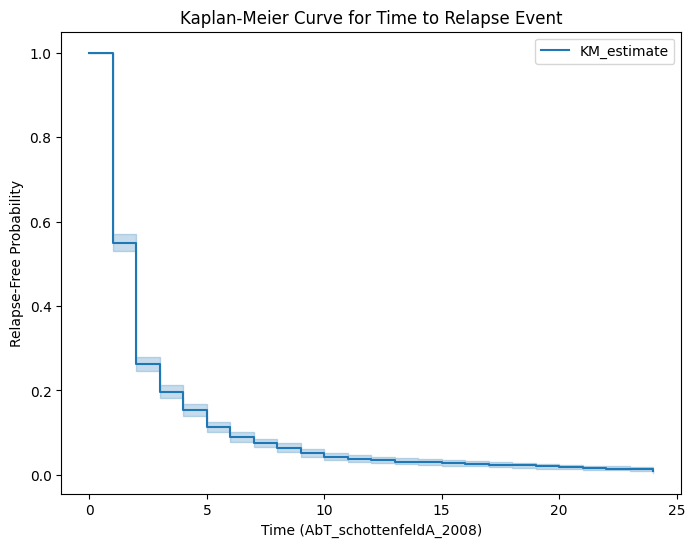

In [65]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming your time (relapse) and event variables are ready
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier model for relapse events
kmf.fit(time_variable, event_variable)

# Create the plot for relapse events
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
kmf.plot_survival_function()

# Add plot title and labels
plt.title('Kaplan-Meier Curve for Time to Relapse Event')
plt.xlabel('Time (AbT_schottenfeldA_2008)')
plt.ylabel('Relapse-Free Probability')

# Save the figure with a higher DPI
plt.savefig('km_relapse_curve.png', dpi=300)

# Show the plot
plt.show()


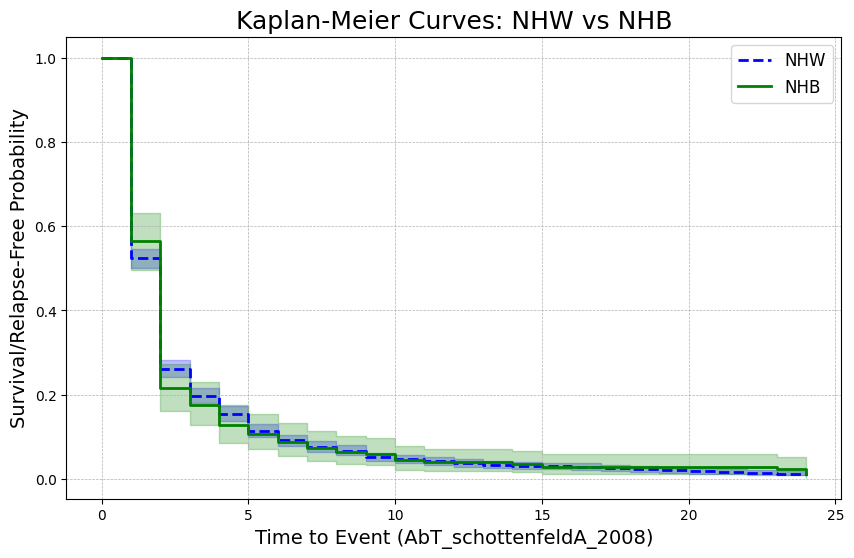

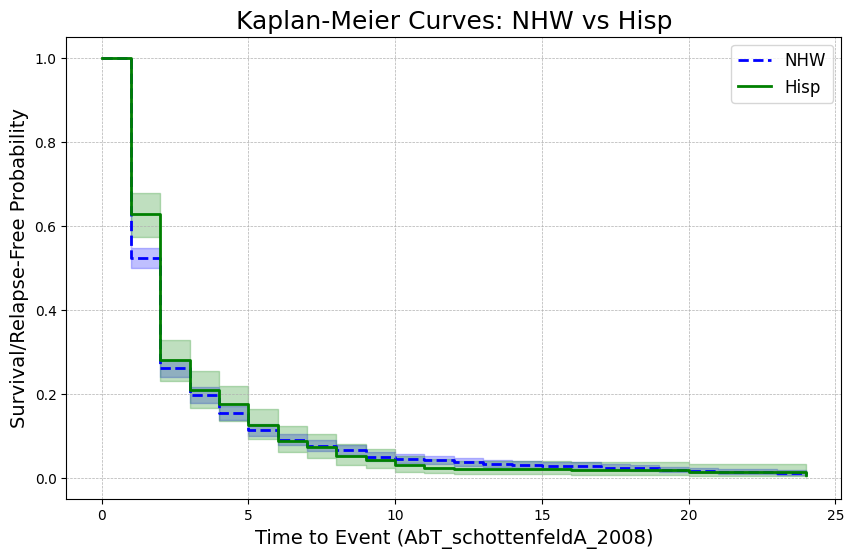

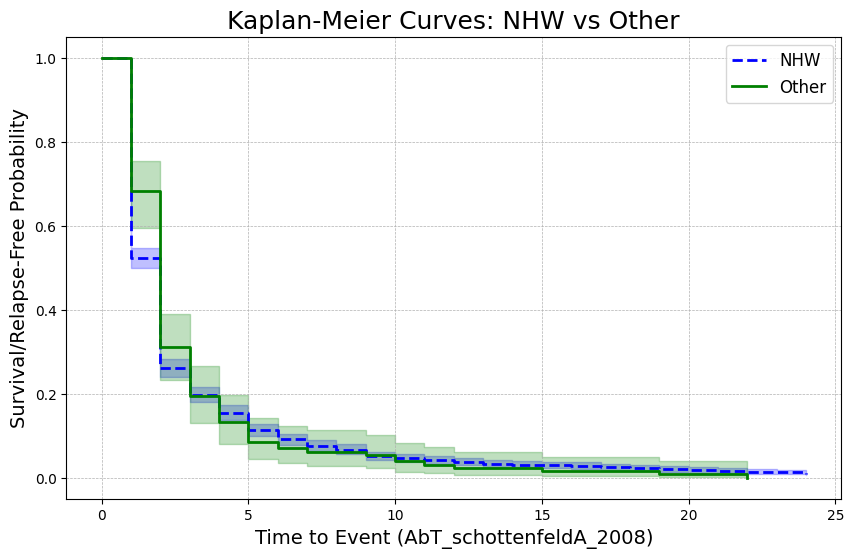

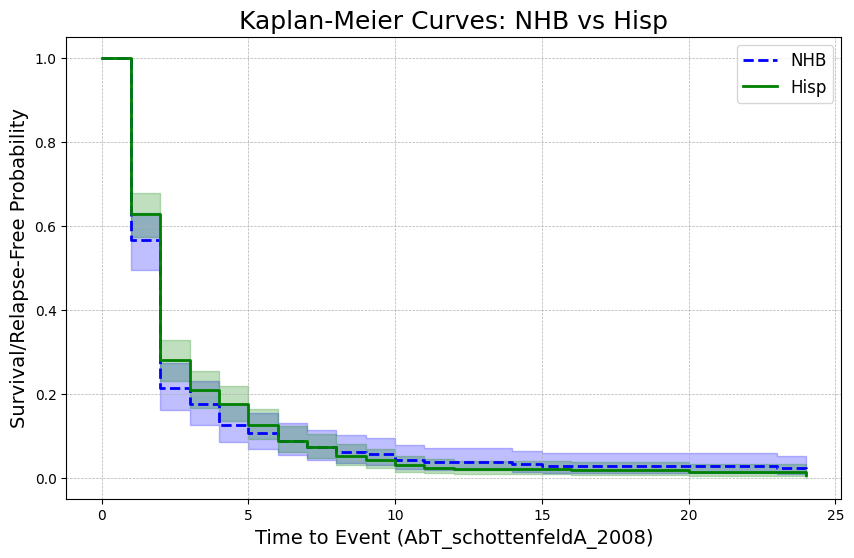

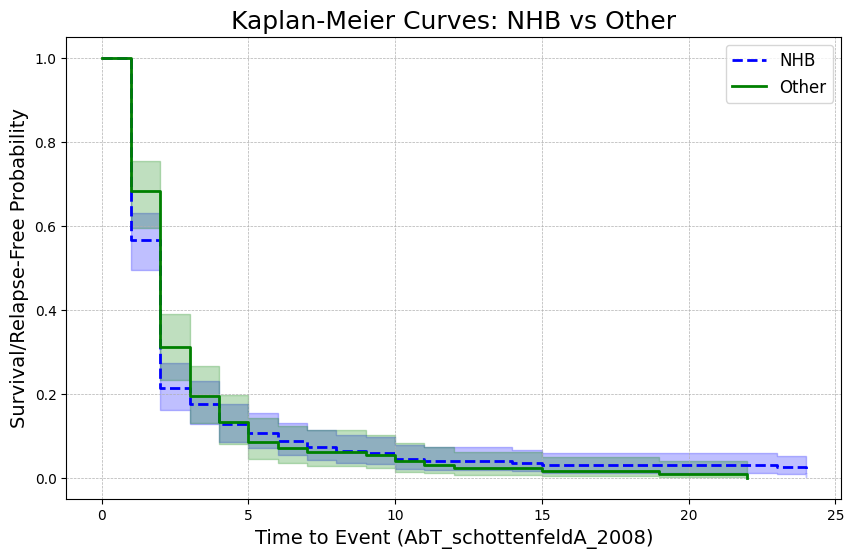

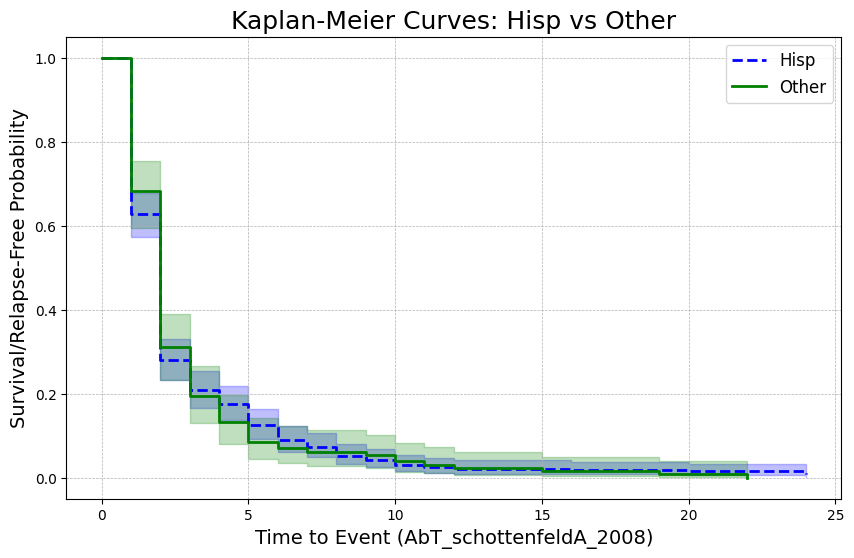

In [72]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from itertools import combinations
import os

# Define the time and event columns as strings
time_column = 'AbT_schottenfeldA_2008'  # Time to event or censoring
event_column = 'AbE_schottenfeldA_2008'  # Event occurred (1) or censored (0)

# Define the output directory
output_dir = 'src/KM_Curves'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of unique race/ethnicity groups
race_eth_groups = ['NHW', 'NHB', 'Hisp', 'Other']

# Generate all combinations of race/ethnicity pairs
race_eth_pairs = list(combinations(race_eth_groups, 2))

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Loop through each race/ethnicity pair and plot Kaplan-Meier curves
for race1, race2 in race_eth_pairs:
    # Filter data for each race/ethnicity group
    group1 = merged_SA_df[merged_SA_df['RaceEth'] == race1]
    group2 = merged_SA_df[merged_SA_df['RaceEth'] == race2]

    # Create a new plot for each race/ethnicity comparison
    plt.figure(figsize=(10, 6))

    # Fit and plot for the first race/ethnicity group with confidence intervals
    kmf.fit(group1[time_column], event_observed=group1[event_column], label=race1)
    ax = kmf.plot_survival_function(ci_show=True, linewidth=2, color="blue", linestyle='--')

    # Fit and plot for the second race/ethnicity group with confidence intervals
    kmf.fit(group2[time_column], event_observed=group2[event_column], label=race2)
    kmf.plot_survival_function(ax=ax, ci_show=True, linewidth=2, color="green")

    # Customize plot for the race/ethnicity pair
    plt.title(f'Kaplan-Meier Curves: {race1} vs {race2}', fontsize=18)
    plt.xlabel('Time to Event (AbT_schottenfeldA_2008)', fontsize=14)
    plt.ylabel('Survival/Relapse-Free Probability', fontsize=14)
    
    # Add a grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Increase the font size of the legend
    plt.legend(fontsize=12)

    output_dir = '/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves'
    # Save the figure in the src/KM_Curves directory with better DPI
    file_path = os.path.join(output_dir, f'km_curve_{race1}_vs_{race2}.png')
    plt.savefig(file_path, dpi=300)

    # Show the plot (optional)
    plt.show()


# Kaplan-Meier Curves Report: Race/Ethnicity Comparisons

## Introduction

The Kaplan-Meier (KM) survival analysis was conducted to compare the time-to-event (e.g., relapse) among different racial and ethnic groups. The analysis includes six different comparisons based on race/ethnicity, and the survival curves are presented to explore differences in relapse-free probability over time. The `AbT_schottenfeldA_2008` variable is used to measure the time to the event, while `AbE_schottenfeldA_2008` is used to measure whether the event occurred.

The analysis compares the following groups:
- Non-Hispanic White (NHW) vs. Non-Hispanic Black (NHB)
- Non-Hispanic White (NHW) vs. Hispanic (Hisp)
- Non-Hispanic White (NHW) vs. Other
- Non-Hispanic Black (NHB) vs. Hispanic (Hisp)
- Non-Hispanic Black (NHB) vs. Other
- Hispanic (Hisp) vs. Other

## Methodology

Kaplan-Meier curves estimate the probability of remaining relapse-free over time for each racial/ethnic group. Each plot includes confidence intervals around the curves, which provide insight into the reliability of the estimates. The comparison between the groups is visualized using survival curves, allowing for an intuitive understanding of which groups tend to relapse earlier or remain relapse-free for longer periods.

## Results and Observations

### 1. Hispanic vs. Other

![Hisp vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_Hisp_vs_Other.png)

The KM curve comparing Hispanic and Other shows that both groups exhibit similar patterns early in the observation period. The Hispanic group appears to have a slightly higher relapse-free probability compared to the Other group, especially after the first 10 time units. The confidence intervals are overlapping, indicating no statistically significant difference in relapse-free probability between the groups.

### 2. Non-Hispanic Black (NHB) vs. Hispanic (Hisp)

![NHB vs Hisp](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_NHB_vs_Hisp.png)

In the comparison between NHB and Hispanic, the two groups show very close survival curves, especially within the first 10 time units. The NHB group has slightly lower relapse-free probabilities as time progresses, though the difference is minimal. The overlapping confidence intervals suggest that the differences between these groups are also not statistically significant.

### 3. Non-Hispanic Black (NHB) vs. Other

![NHB vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_NHB_vs_Other.png)

The comparison of NHB and Other groups shows that the Other group tends to have slightly better relapse-free probabilities, particularly in the early time periods. However, the difference between the two groups narrows over time, with both groups converging toward similar probabilities after 15 time units. The overlapping confidence intervals indicate that these differences are likely not statistically significant.

### 4. Non-Hispanic White (NHW) vs. Hispanic (Hisp)

![NHW vs Hisp](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_NHW_vs_Hisp.png)

This comparison shows that the NHW group consistently maintains higher relapse-free probabilities compared to the Hispanic group. Although the curves are close initially, NHW diverges and shows a higher survival rate. Despite the differences, the overlapping confidence intervals imply the observed difference may not be statistically significant.

### 5. Non-Hispanic White (NHW) vs. Non-Hispanic Black (NHB)

![NHW vs NHB](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_NHW_vs_NHB.png)

The KM curve comparing NHW and NHB groups shows that NHW tends to have better relapse-free probabilities, especially in the first half of the time period. NHB experiences a sharper decline in survival probability early on. While there is some divergence between the groups, the confidence intervals overlap, suggesting caution when interpreting these differences.

### 6. Non-Hispanic White (NHW) vs. Other

![NHW vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/KM_Curves/km_curve_NHW_vs_Other.png)

In the comparison between NHW and Other, NHW again shows higher relapse-free probabilities for most of the observed time period. The Other group experiences a steeper decline early on but stabilizes later. The overlapping confidence intervals indicate that the differences may not be statistically significant, though the NHW group consistently exhibits a higher survival rate.

## Discussion

The Kaplan-Meier curves demonstrate differences in relapse-free probabilities across racial/ethnic groups. Overall, the Non-Hispanic White group tends to have better outcomes, with higher survival (relapse-free) probabilities compared to the other groups. The Hispanic and Non-Hispanic Black groups display similar patterns, with both groups exhibiting a higher relapse rate compared to NHW. The "Other" group shows a mixed pattern but tends to perform worse compared to NHW and similarly to NHB and Hispanic.

Although visual differences are present, the overlapping confidence intervals in many comparisons indicate that these differences may not be statistically significant. Further statistical tests, such as log-rank tests or Cox proportional hazards modeling, would be useful to confirm the significance of these findings.

## Conclusion

In summary:
- The Non-Hispanic White group consistently displays better relapse-free survival compared to other groups.
- The Hispanic, Non-Hispanic Black, and Other groups exhibit higher relapse rates, but the differences between them are relatively small.
- Confidence intervals overlap in most cases, suggesting that these differences may not be statistically significant without further testing.

## Next Steps

- Perform statistical tests, such as the log-rank test, to evaluate the significance of the observed differences between groups.
- Fit a Cox Proportional Hazards model to adjust for additional covariates (e.g., age, sex, socioeconomic status) to better understand the impact of race/ethnicity on relapse.


# Log-Rank Test P-Value on Kaplan-Meier Curves

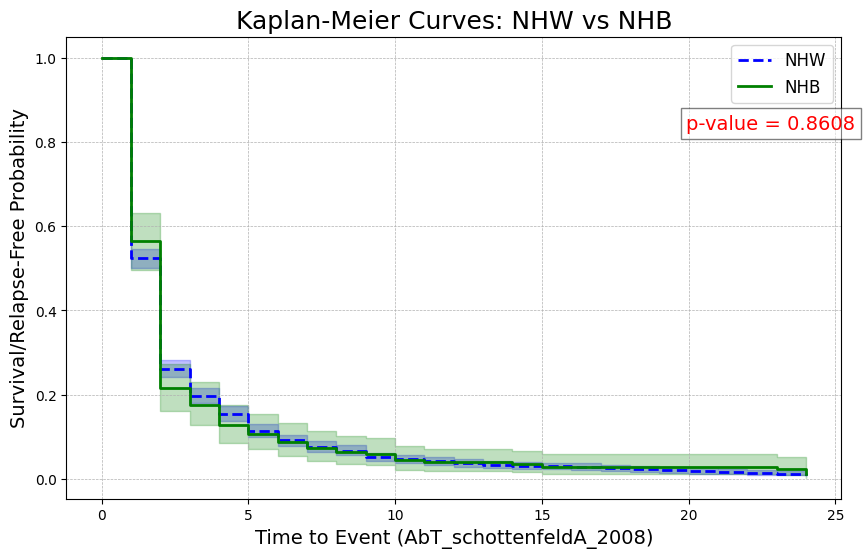

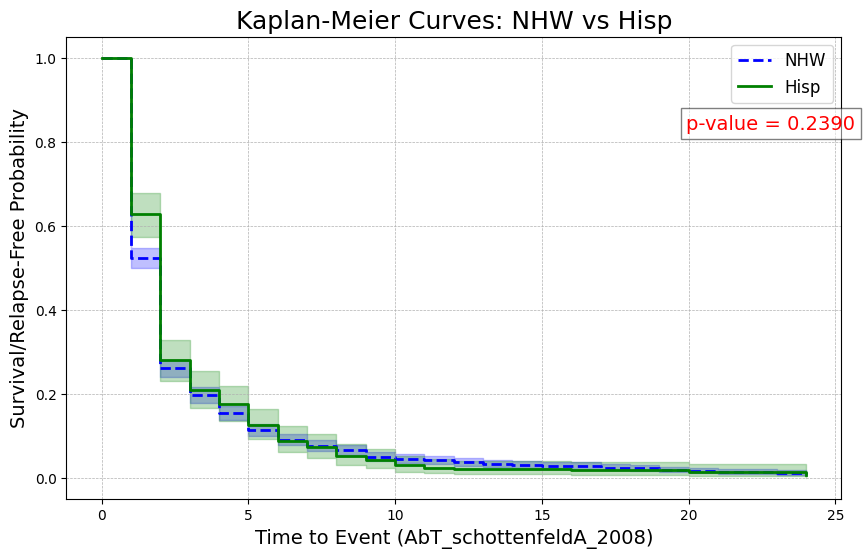

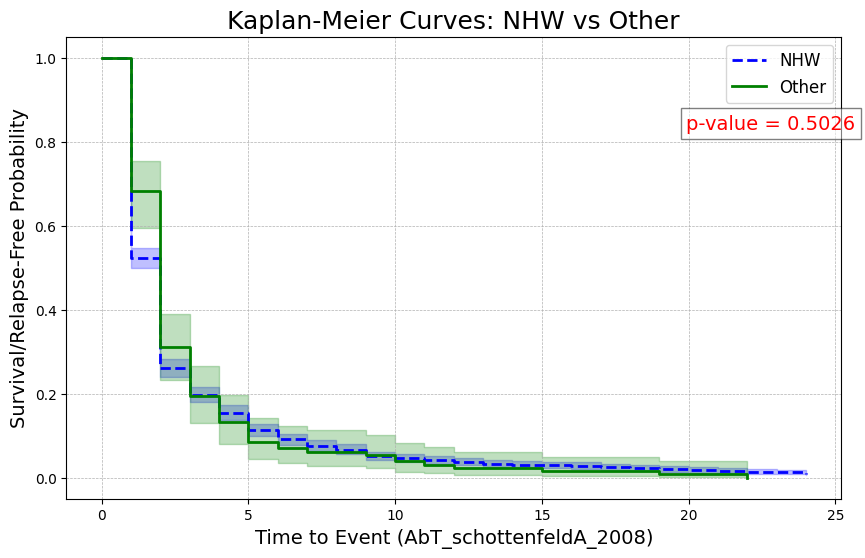

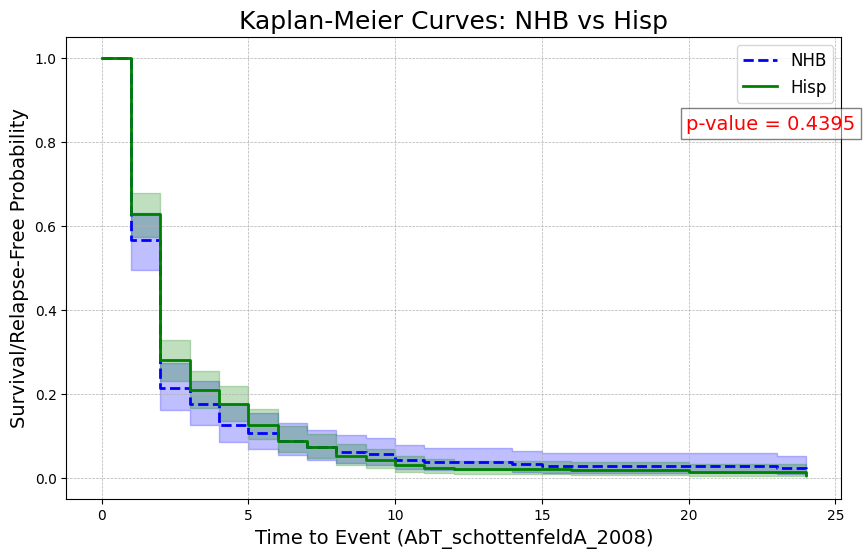

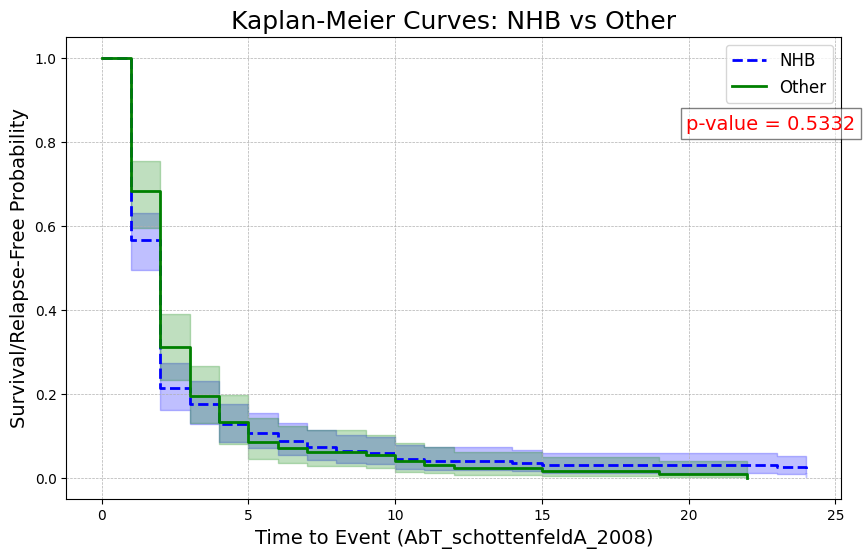

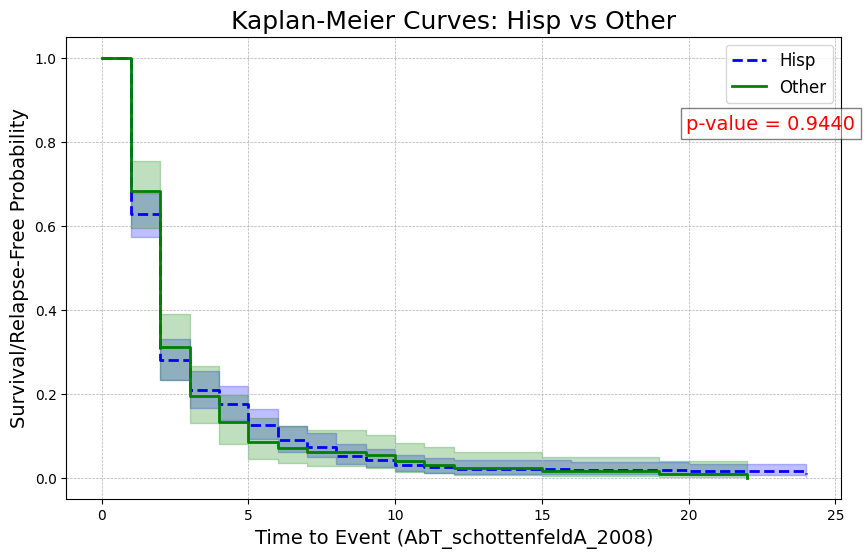

In [76]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from itertools import combinations

# Define the time and event columns as strings
time_column = 'AbT_schottenfeldA_2008'  # Time to event or censoring
event_column = 'AbE_schottenfeldA_2008'  # Event occurred (1) or censored (0)

# List of race/ethnicity pairs to compare
race_eth_pairs = [
    ('NHW', 'NHB'),
    ('NHW', 'Hisp'),
    ('NHW', 'Other'),
    ('NHB', 'Hisp'),
    ('NHB', 'Other'),
    ('Hisp', 'Other')
]

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Perform the log-rank test and plot the Kaplan-Meier curves for each pair of race/ethnicity groups
for race1, race2 in race_eth_pairs:
    # Filter data for each race/ethnicity group
    group1 = merged_SA_df[merged_SA_df['RaceEth'] == race1]
    group2 = merged_SA_df[merged_SA_df['RaceEth'] == race2]

    # Perform log-rank test
    results = logrank_test(
        group1[time_column], group2[time_column], 
        event_observed_A=group1[event_column], event_observed_B=group2[event_column]
    )
    
    # Get the p-value from the log-rank test
    p_value = results.p_value

    # Create a new plot for each race/ethnicity comparison
    plt.figure(figsize=(10, 6))

    # Fit and plot for the first race/ethnicity group with confidence intervals
    kmf.fit(group1[time_column], event_observed=group1[event_column], label=race1)
    ax = kmf.plot_survival_function(ci_show=True, linewidth=2, color="blue", linestyle='--')

    # Fit and plot for the second race/ethnicity group with confidence intervals
    kmf.fit(group2[time_column], event_observed=group2[event_column], label=race2)
    kmf.plot_survival_function(ax=ax, ci_show=True, linewidth=2, color="green")

    # Customize plot for the race/ethnicity pair
    plt.title(f'Kaplan-Meier Curves: {race1} vs {race2}', fontsize=18)
    plt.xlabel('Time to Event (AbT_schottenfeldA_2008)', fontsize=14)
    plt.ylabel('Survival/Relapse-Free Probability', fontsize=14)

    # Display the p-value from the log-rank test
    plt.text(0.8, 0.8, f'p-value = {p_value:.4f}', transform=ax.transAxes, fontsize=14, color='red', bbox=dict(facecolor='white', alpha=0.5))

    # Add a grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Increase the font size of the legend
    plt.legend(fontsize=12)


    # Define the output directory
    output_dir = '/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval'

    # Save each figure to the specified directory
    file_path = os.path.join(output_dir, f'km_curve_{race1}_vs_{race2}_logrank.png')
    plt.savefig(file_path, dpi=300)
    
    # Show the plot
    plt.show()


# Report on Log-Rank Test Results from Kaplan-Meier Curves

This report summarizes the statistical significance of the survival differences between various racial/ethnic groups using the log-rank test. The p-values from the log-rank tests are displayed on each corresponding Kaplan-Meier curve, and they allow us to assess whether the survival curves are significantly different between groups. A p-value less than 0.05 is generally considered statistically significant, indicating that the survival distributions differ significantly between the groups.

---

## 1. **Hispanic (Hisp) vs. Other**
- **P-Value**: 0.9440  
- **Interpretation**: The p-value is quite large (0.9440), indicating no statistically significant difference between the relapse-free survival probabilities of the Hispanic and Other groups. Both groups have similar survival distributions.

![Hisp vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_Hisp_vs_Other_logrank.png)

---

## 2. **Non-Hispanic Black (NHB) vs. Hispanic (Hisp)**
- **P-Value**: 0.4395  
- **Interpretation**: The p-value (0.4395) suggests that there is no statistically significant difference in the survival distributions between NHB and Hispanic groups. The survival/relapse-free probabilities are likely to be similar for these two groups.

![NHB vs Hisp](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_NHB_vs_Hisp_logrank.png)

---

## 3. **Non-Hispanic Black (NHB) vs. Other**
- **P-Value**: 0.5332  
- **Interpretation**: The p-value (0.5332) is not statistically significant, indicating that there is no significant difference between the survival curves of the NHB and Other groups. The two groups have comparable survival distributions over time.

![NHB vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_NHB_vs_Other_logrank.png)

---

## 4. **Non-Hispanic White (NHW) vs. Hispanic (Hisp)**
- **P-Value**: 0.2390  
- **Interpretation**: With a p-value of 0.2390, this comparison between NHW and Hispanic is not statistically significant. This indicates that the relapse-free survival probabilities for NHW and Hispanic individuals are not meaningfully different based on the current data.

![NHW vs Hisp](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_NHW_vs_Hisp_logrank.png)

---

## 5. **Non-Hispanic White (NHW) vs. Non-Hispanic Black (NHB)**
- **P-Value**: 0.8608  
- **Interpretation**: The p-value (0.8608) shows no statistically significant difference between the survival distributions of NHW and NHB groups. Both groups exhibit similar relapse-free probabilities over time.

![NHW vs NHB](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_NHW_vs_NHB_logrank.png)

---

## 6. **Non-Hispanic White (NHW) vs. Other**
- **P-Value**: 0.5026  
- **Interpretation**: The p-value (0.5026) indicates no statistically significant difference between the NHW and Other groups. Both groups display comparable survival probabilities.

![NHW vs Other](/Users/ganeshjai/Documents/GitHub/Pipeline/src/LogRank_Pval/km_curve_NHW_vs_Other_logrank.png)

---

## **Summary of Findings**:
- Across all comparisons, none of the p-values are below the 0.05 threshold for statistical significance. This suggests that the differences in relapse-free survival between the race/ethnicity groups analyzed are not statistically significant based on the available data.
- While there may be visual differences in the Kaplan-Meier curves, the log-rank test suggests that these differences are likely due to chance rather than meaningful differences in survival distributions.

## **Next Steps**:
- Given the lack of statistical significance in the comparisons, further analysis could focus on incorporating additional covariates (e.g., age, socioeconomic status, etc.) using a Cox Proportional Hazards model to see if there are other factors influencing survival/relapse rates across different racial/ethnic groups.
- Larger sample sizes or alternative statistical methods might be explored if the goal is to detect smaller differences in survival probabilities.


#  Cox Proportional Hazards (CoxPH)

In [77]:
merged_SA_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,5,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,2,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0

In [78]:
import pandas as pd
from lifelines import CoxPHFitter

# Select relevant columns for the Cox model
# For example, we include time, event, race, age, and gender (or any other covariates you want to include)
df_cox = merged_SA_df[['AbT_schottenfeldA_2008', 'AbE_schottenfeldA_2008', 'RaceEth', 'age', 'Sex']]

# Convert categorical variables (e.g., 'RaceEth' and 'sex') into dummy variables
df_cox = pd.get_dummies(df_cox, columns=['RaceEth', 'Sex'], drop_first=True)


In [80]:
# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the Cox model to the data
cph.fit(df_cox, duration_col='AbT_schottenfeldA_2008', event_col='AbE_schottenfeldA_2008')

# Output the summary of the Cox model
cph.print_summary()  # This will show hazard ratios, p-values, confidence intervals, etc.


<lifelines.CoxPHFitter: fitted with 2393 total observations, 26 right-censored observations>
             duration col = 'AbT_schottenfeldA_2008'
                event col = 'AbE_schottenfeldA_2008'
      baseline estimation = breslow
   number of observations = 2393
number of events observed = 2367
   partial log-likelihood = -16158.42
         time fit was run = 2024-10-31 14:52:30 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
age           -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
RaceEth_NHB    0.12      1.13      0.09           -0.06            0.30                0.94                1.34
RaceEth_NHW    0.05      1.05      0.06           -0.07            0.17                0.93                1.19
RaceEth_Other -0.03      0.97      0.10           -0.23            0.18                0.79                1.19
Sex_male      -0.01      0.99      0.04           -0.10            0.07                0.91                1.08

               cmp to     z      p  -log2(p)
covariate                                   
age              0.00 -3.34 <0.005     10.20
RaceEth_NHB      0.00  1.30   0.19      2.37
RaceEth_NHW      0.00  0.85   0.40      1.34
RaceEth_Other    0.00 -0.26   0.79      0.33
Sex_male         0.00 -0.27   0.79      0.34
---
Concordance = 0.54
Partial AIC = 32326.85
log-likelihood ratio test = 13.53 on 5 df
-log2(p) of ll-ratio test = 5.73

<Axes: xlabel='log(HR) (95% CI)'>

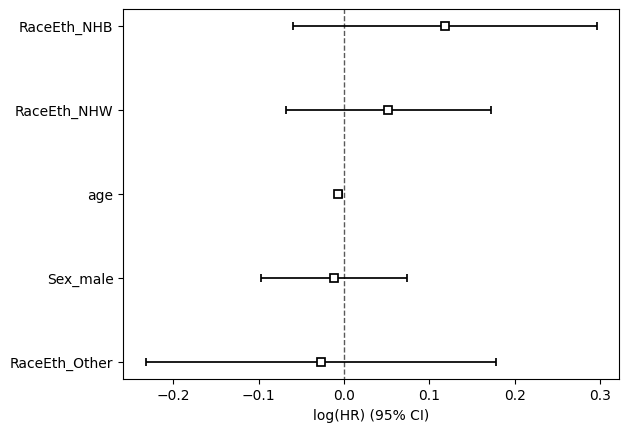

In [81]:
# Plot the coefficients and confidence intervals
cph.plot()


In [82]:
# Check the proportional hazards assumption
cph.check_assumptions(df_cox, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2393 total observations, 26 right-censored observations>
         test_name = proportional_hazard_test

---
                    test_statistic      p  -log2(p)
RaceEth_NHB   km              3.11   0.08      3.69
              rank            1.46   0.23      2.14
RaceEth_NHW   km              9.54 <0.005      8.96
              rank            4.03   0.04      4.48
RaceEth_Other km              1.95   0.16      2.62
              rank            1.83   0.18      2.51
Sex_male      km              0.11   0.74      0.44
              rank            0.15   0.70      0.51
age           km              1.07   0.30      1.73
              rank            1.20   0.27      1.87



1. Variable 'RaceEth_NHW' failed the non-proportional test: p-value is 0.0020.

   Advice: with so few unique values (only 2), you can include `strata=['RaceEth_NHW', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[]